# Diagnosis EDA & Wrangling

This notebook focuses in the exploratory data analysis of the patient's diagnnostic features.

**Findings & Accomplishments:** 

+ The diagnosis features are coded using CID-10 codes. Especifically, providers use the subcategory codes of this codebook to record a patient's diagnosis. 
+ To aid interpretation I added, the diagnosis codes description, groups, categories and chapters.
+ Variables were declared as categorical and re-coded for consistency.
+ The distribution of diagnosis is highly unbalanced. While there are diagnosis that are more common than others, the top diagnoes are still a fraction of the total. As such, there is a lot of heterogeneity in this variable.
+ The point above is evidence by the large confidence intervals for the mean diagnosis counts.

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import rcParams
from scipy import stats

**Set Matplot Lib & Seaborn Styles** 

In [2]:
#Set Graphs style

rcParams['figure.figsize'] = 12, 12

rcParams['font.size'] = 12

sns.set(style='darkgrid')

sns.set_style({"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context("talk", font_scale=1.5)

## Upload Random Sampled Data

Upload diagnosis columns from the random sample created from the AIH 2015 - 2018 files.

In [3]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')


# Patient demographic columns 

diag = ['ANO_CMPT','MES_CMPT','DIAG_PRINC','DIAG_SECUN']


diag_data = pd.read_csv(AIH_sample_path2, 
                        encoding = 'UTF-8', 
                        na_values= ['NaN',' ',''],
                        usecols = diag)

Wall time: 2min 4s


In [4]:
diag_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16614830 entries, 0 to 16614829
Data columns (total 4 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
DIAG_PRINC    16614830 non-null object
DIAG_SECUN    16614830 non-null int64
dtypes: int64(3), object(1)
memory usage: 507.0+ MB


In [5]:
diag_data.head()

ANO_CMPT  MES_CMPT DIAG_PRINC  DIAG_SECUN
0      2015         8       O623           0
1      2015         8       P599           0
2      2015        10       O800           0
3      2015         3       S524           0
4      2015        12       L989           0

### Upload CID - 10 codebooks

Upload diagnosis codes (CID-10) codebooks. The CID-10 is an standard diagnostic codebook. It is divided by chapers, groups, categories and subcategories of diagnosis.

I will upload two codebooks: 

+ CID-10 containing all available categories and groups of diagnosis 
+ CID-10 codebook containing all available subcategories. The subcategories is what providers use for diagnosis purposes.

In [6]:
CID10_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/CID10CSV/CID10_clean.xlsx')

CID10_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/References/CID10CSV/CID10_clean.xlsx')

#Upload sheet containing diganosis categories

CID10_CAT = pd.read_excel(CID10_path2, sheet_name = 'CAT')

#Upload sheet containing diagnosis sub-categories. These are the ones used by providers for diagnosis.
# They map to broader gropus.

CID10_SUBCAT = pd.read_excel(CID10_path2, sheet_name = 'SUB_CAT')

In [7]:
# See categories codebook information

print(CID10_CAT.info())

CID10_CAT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 5 columns):
CAP        2045 non-null int64
DES_CAP    2045 non-null object
DES_GRP    2043 non-null object
CAT        2045 non-null object
DES_CAT    2045 non-null object
dtypes: int64(1), object(4)
memory usage: 80.0+ KB
None


CAP                                            DES_CAP  \
0    1  Capítulo I - Algumas doenças infecciosas e par...   
1    1  Capítulo I - Algumas doenças infecciosas e par...   
2    1  Capítulo I - Algumas doenças infecciosas e par...   
3    1  Capítulo I - Algumas doenças infecciosas e par...   
4    1  Capítulo I - Algumas doenças infecciosas e par...   

                           DES_GRP  CAT  \
0  Doenças infecciosas intestinais  A00   
1  Doenças infecciosas intestinais  A01   
2  Doenças infecciosas intestinais  A02   
3  Doenças infecciosas intestinais  A03   
4  Doenças infecciosas intestinais  A04   

                                    DES_CAT  
0                                    Cólera  
1              Febres tifóide e paratifóide  
2           Outras infecções por Salmonella  
3                                Shiguelose  
4  Outras infecções intestinais bacterianas

In [8]:
# See sub-categories codebook information

print(CID10_SUBCAT.info())

CID10_SUBCAT.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12451 entries, 0 to 12450
Data columns (total 3 columns):
CAT           12451 non-null object
SUBCAT        12451 non-null object
SUBCAT_DES    12451 non-null object
dtypes: object(3)
memory usage: 291.9+ KB
None


CAT SUBCAT                          SUBCAT_DES
0  A00   A000  Cólera devida a Vibrio cholerae 01
1  A00   A001  Cólera devida a Vibrio cholerae 01
2  A00   A009             Cólera não especificada
3  A01   A010                       Febre tifóide
4  A01   A011                 Febre paratifóide A

## Merge patient's diagnosis data with CID-10 codebook

The purpose of this merge is to gain more insight into the diagnosis data and aid interpretation of diagnosis codes.

In [9]:
# Merge diagnosis subcategories with patient's diagnosis data

diag_CID10 = pd.merge(diag_data, CID10_SUBCAT, 
                       how = 'left', left_on = 'DIAG_PRINC', 
                       right_on = 'SUBCAT')

In [10]:
diag_CID10.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 7 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
DIAG_PRINC    16614830 non-null object
DIAG_SECUN    16614830 non-null int64
CAT           16614830 non-null object
SUBCAT        16614830 non-null object
SUBCAT_DES    16614830 non-null object
dtypes: int64(3), object(4)
memory usage: 1014.1+ MB


In [11]:
# Merge diagnosis categories with patient's diagnosis data

diag_CID10 = pd.merge(diag_CID10, CID10_CAT, 
                       how = 'left', on = 'CAT')

In [12]:
#See merges final results

diag_CID10.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 11 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
DIAG_PRINC    16614830 non-null object
DIAG_SECUN    16614830 non-null int64
CAT           16614830 non-null object
SUBCAT        16614830 non-null object
SUBCAT_DES    16614830 non-null object
CAP           16614830 non-null int64
DES_CAP       16614830 non-null object
DES_GRP       16608819 non-null object
DES_CAT       16614830 non-null object
dtypes: int64(4), object(7)
memory usage: 1.5+ GB


No null values created by the merges.

## Diagnosis Data Bloc Initial Exploration and Wrangling

In this section, I will do a preliminary exploration of the demographic features and do data warngling needed such as dealing with missing values and converting categorical variables. 

In [13]:
# See dataframe's first 10 rows

diag_CID10.head(10)

ANO_CMPT  MES_CMPT DIAG_PRINC  DIAG_SECUN  CAT SUBCAT  \
0      2015         8       O623           0  O62   O623   
1      2015         8       P599           0  P59   P599   
2      2015        10       O800           0  O80   O800   
3      2015         3       S524           0  S52   S524   
4      2015        12       L989           0  L98   L989   
5      2015         8        I10           0  I10    I10   
6      2015         7       S367           0  S36   S367   
7      2015        12        A90           0  A90    A90   
8      2015        11       K299           0  K29   K299   
9      2015         1       O808           0  O80   O808   

                                         SUBCAT_DES  CAP  \
0                     Trabalho de parto precipitado   15   
1               Icterícia neonatal não especificada   16   
2                         Parto espontâneo cefálico   15   
3  Fratura das diáfises do rádio e do cúbito [ulna]   19   
4           Afecções da pele e do tecido subcutâneo   12   
5                  Hipertensão essencial (primária)    9   
6  Traumatismo de múltiplos órgãos intra-abdominais   19   
7                          Dengue [dengue clássico]    1   
8                                   Gastroduodenite   11   
9            Outros tipos de parto único espontâneo   15   

                                             DES_CAP  \
0                             Capítulo XV - Gravidez   
1  Capítulo XVI - Algumas afecções originadas no ...   
2                             Capítulo XV - Gravidez   
3                              Capítulo XIX - Lesões   
4  Capítulo XII - Doenças da pele e do tecido sub...   
5     Capítulo IX - Doenças do aparelho circulatório   
6                              Capítulo XIX - Lesões   
7  Capítulo I - Algumas doenças infecciosas e par...   
8        Capítulo XI - Doenças do aparelho digestivo   
9                             Capítulo XV - Gravidez   

                                             DES_GRP  \
0       Complicações do trabalho de parto e do parto   
1  Transtornos hemorrágicos e hematológicos do fe...   
2                                              Parto   
3            Traumatismos do cotovelo e do antebraço   
4     Outras afecções da pele e do tecido subcutâneo   
5                              Doenças hipertensivas   
6                             Traumatismos do abdome   
7  Febres por arbovírus e febres hemorrágicas virais   
8                                 Doenças do esôfago   
9                                              Parto   

                                             DES_CAT  
0                 Anormalidades da contração uterina  
1  Icterícia neonatal devida a outras causas e às...  
2                             Parto único espontâneo  
3                               Fratura do antebraço  
4  Outras afecções da pele e do tecido subcutâneo...  
5                   Hipertensão essencial (primária)  
6             Traumatismo de órgãos intra-abdominais  
7                           Dengue [dengue clássico]  
8                               Gastrite e duodenite  
9                             Parto único espontâneo

In [14]:
diag_CID10.describe()

ANO_CMPT      MES_CMPT  DIAG_SECUN           CAP
count  1.661483e+07  1.661483e+07  16614830.0  1.661483e+07
mean   2.016326e+03  6.101982e+00         0.0  1.121945e+01
std    1.052621e+00  3.348307e+00         0.0  5.484773e+00
min    2.015000e+03  1.000000e+00         0.0  1.000000e+00
25%    2.015000e+03  3.000000e+00         0.0  9.000000e+00
50%    2.016000e+03  6.000000e+00         0.0  1.100000e+01
75%    2.017000e+03  9.000000e+00         0.0  1.500000e+01
max    2.018000e+03  1.200000e+01         0.0  2.200000e+01

From the descriptive statistics I find:
* Secundary diagnosis is empty.
* There are no missing values.

Drop empty or redundant columns. SUBCAT and primary diagnosis variables hold the same information.

In [15]:
#Drop empty or redundant columns

diag_CID10.drop(axis = 1, columns = ['DIAG_SECUN', 'SUBCAT'])

#Rename subcategory or principal diagnosis column description

diag_CID10.rename(columns={'SUBCAT_DES':'DIAG_PRINC_DES'}, inplace=True)

### Create Categorical Variables for Diagnosis Codes

Declare categorical variables as categorical

In [18]:
# Subcategory or principal diagnosis codes

diag_CID10["DIAG_PRINC"] = diag_CID10["DIAG_PRINC"].astype('category')

# Category codes

diag_CID10["CAT"] = diag_CID10["CAT"].astype('category')

# Diagnosis chaper codes

diag_CID10["CAP"] = diag_CID10["CAP"].astype('category')

# Diagnosis Group

diag_CID10["DES_GRP"] = diag_CID10["DES_GRP"].astype('category')

Create new columns with new categorical codes.This is meant to keep the original categories with new values. The original values come from adminstrative codebooks. This is to make it consistent types of values.

In [19]:
# Create new columns with numerical codes codes

diag_CID10["DIAG_PRINC_CAT"] = diag_CID10["DIAG_PRINC"].cat.codes

diag_CID10["CAT_CAT"] = diag_CID10["CAT"].cat.codes

diag_CID10["CAP_CAT"] = diag_CID10["CAP"].cat.codes

diag_CID10["GRP_CAT"] = diag_CID10["DES_GRP"].cat.codes

## Prepare for Data and Functions for Exploration

Segment dataset by year for data exploration purposes. 

In [20]:
diag_2015 = diag_CID10[diag_CID10['ANO_CMPT'] == 2015]

diag_2016 = diag_CID10[diag_CID10['ANO_CMPT'] == 2016]

diag_2017 = diag_CID10[diag_CID10['ANO_CMPT'] == 2017]

diag_2018 = diag_CID10[diag_CID10['ANO_CMPT'] == 2018]

Define Data Exploration Helper Functions

These functions are meant to make the plotting graphs and exploration more efficient later on. 

In [21]:
#Create function to do bar count plots of categorical variables.

def count_plot(df = None, col_name = None,
                title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Create bar count plots of categorical variables. 
    
       Return counts in x,xxx,xxx format'''
    
    ax = df[col_name].value_counts().plot(kind="bar")
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [22]:
#Create function to do bar count plots of categorical variables. It plots the most frequent items. 
# This is to plot features that have many categories and plotting all categories is not possible.

def count_plot_slice(df = None, col_name = None, head = 20, 
                     title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Plot count plots of the n-top items most frequent in an feature'''
    
    ax = df[col_name].value_counts().head(head).plot(kind='bar')
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [23]:
# Create function to count categorical values by category and year.

def count_plot_hue(df = None, col_name = None, 
                   hue = 'ANO_CMPT',title = 'Title Here', ylabel = '',
                   xlabel = 'count'):
               
    ax = sns.countplot(y= col_name, hue = hue, data= df)
    
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

In [24]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [25]:
def norm_dist_tests(df = None, col_name = None): 
    
    '''Calculate the 'D’Agostino and Pearson’s, Anderson-Darling and Basic Distrubition stats   '''
    
    # D’Agostino and Pearson’s Normality Test
    
    pearson = stats.normaltest(df[col_name])
    
    # Anderson-Darling Normality Test
    
    anderson = stats.anderson(df[col_name])
    
    # Distribution Stats
    
    dist_stats = stats.describe(df[col_name])
    
    # Print results
    
    print('D’Agostino and Pearson’s: ', pearson)
    
    print('Anderson-Darling: ', anderson)
    
    print('Distribution Statistics: ', dist_stats)

In [26]:
def theor_ecdf(df = None , col_name = None, seed = 42): 
    
    '''Calculate theortical normal distribution of a feature '''
    
    #Determine lenght of the series (to calculate number of samples needed)
    
    size_df = len(df)
    
    # Calculate mean and standard deviation
    
    mean_user_play = np.mean(df[col_name])
    
    std_user_play = np.std(df[col_name])
    
    # Set random seed 
    
    np.random.seed(seed)
    
    # Draw random normal samples
    
    samples = np.random.normal(mean_user_play, std_user_play, size=size_df)
    
    # Apply ecf function to theoritical samples

    x_theor, y_theor = ecdf(samples)
    
    return x_theor, y_theor

In [27]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [28]:
def boot_conf_int(ci = [2.5,97.5], mean_rep = None, mean = None, n_tries = 10000):
    
    #Bootstrap confidence interval
    
    ci = np.percentile(mean_rep,[2.5,97.5])
    
    pvalue = sum(mean_rep <= mean)/n_tries
    
    print('Bootstrap Mean Replicates 95% CI: ', ci)
    
    print('P-value of patient age mean replicates: ', pvalue)

## Exploratory Analysis of Diagnosis Data

### Variable: `Principal Diagnosis`

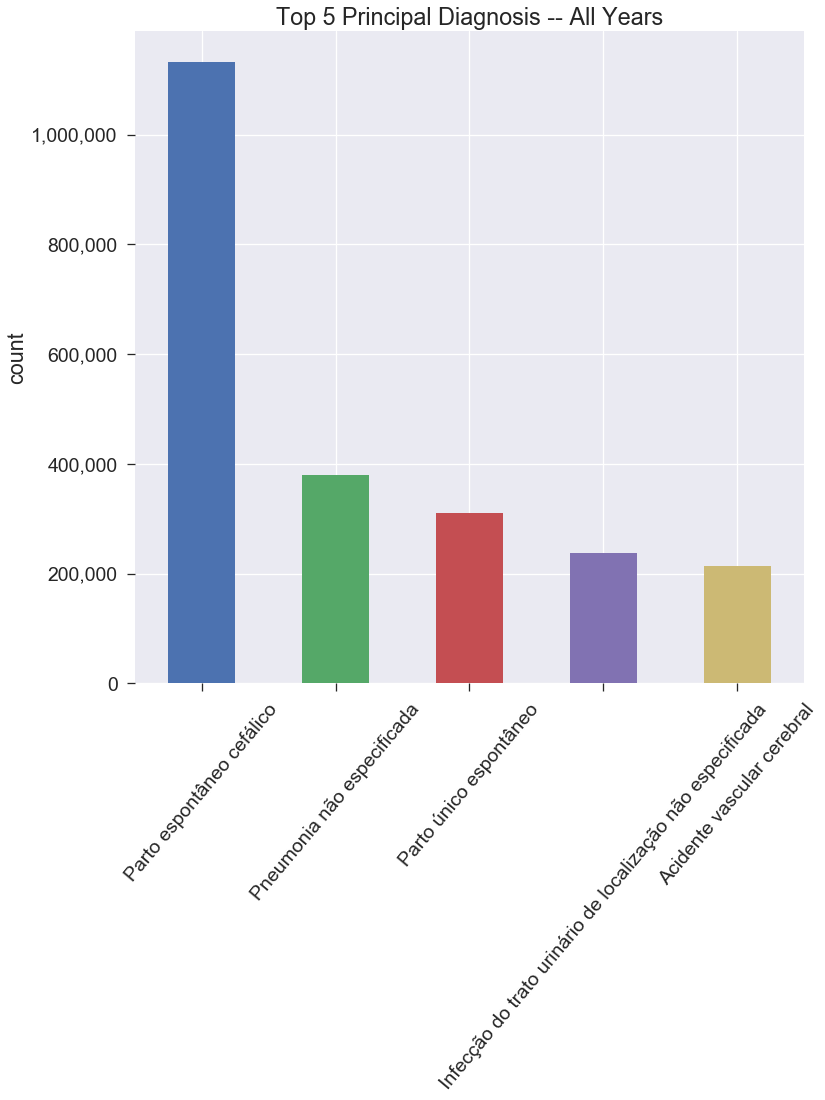

In [29]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- All Years', 
                 xlabel = '', ylabel = 'count')

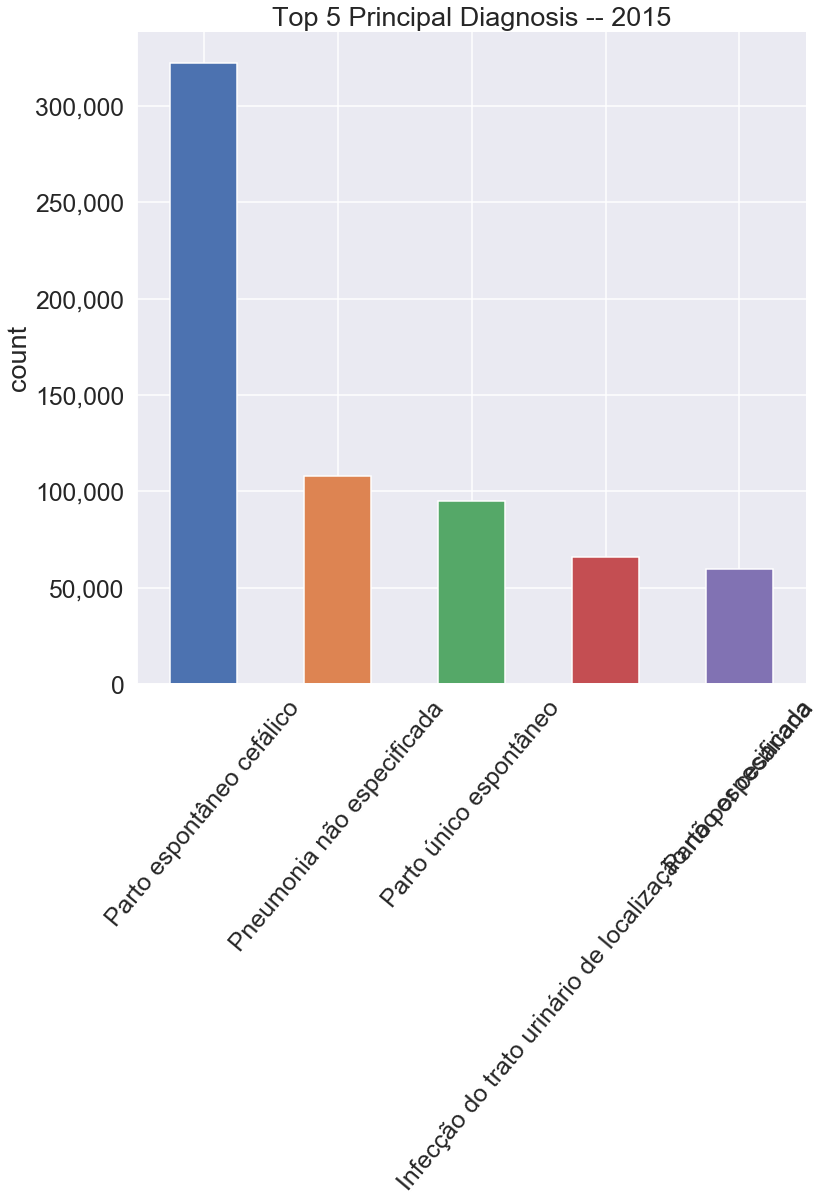

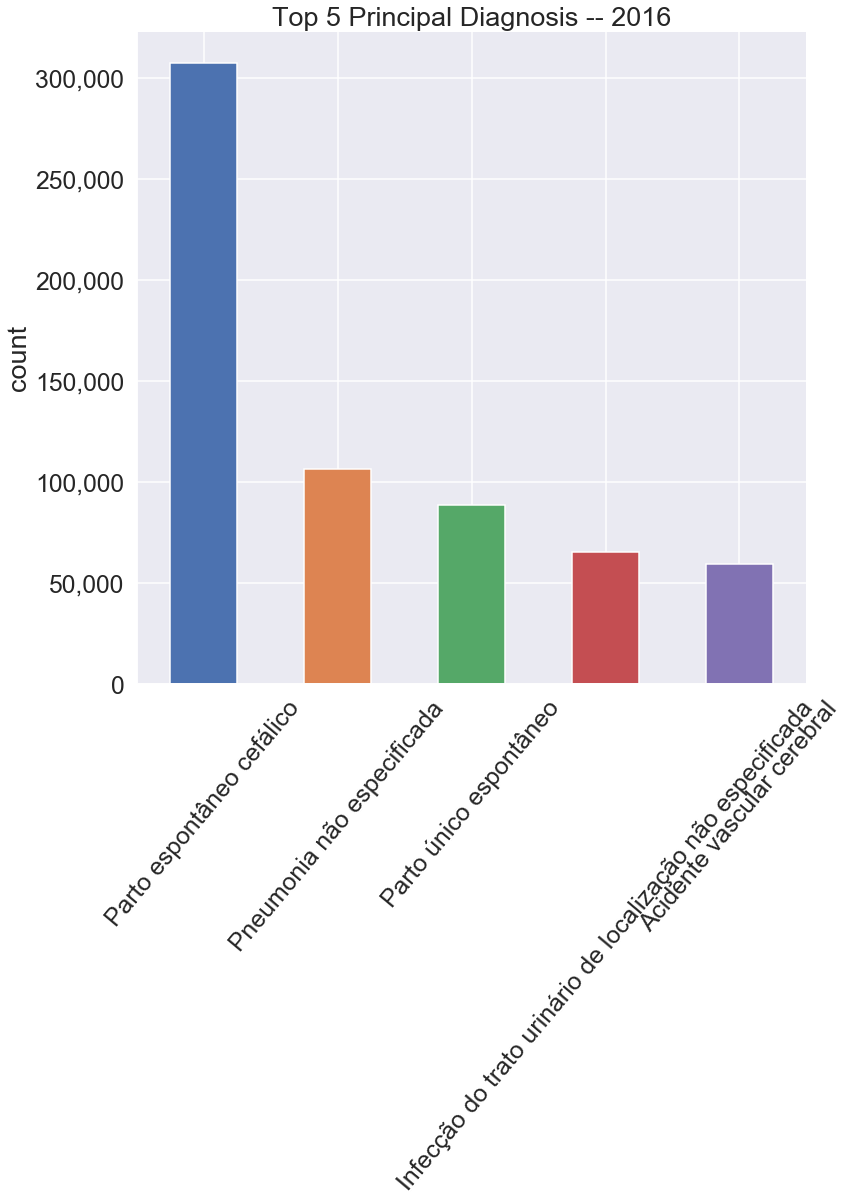

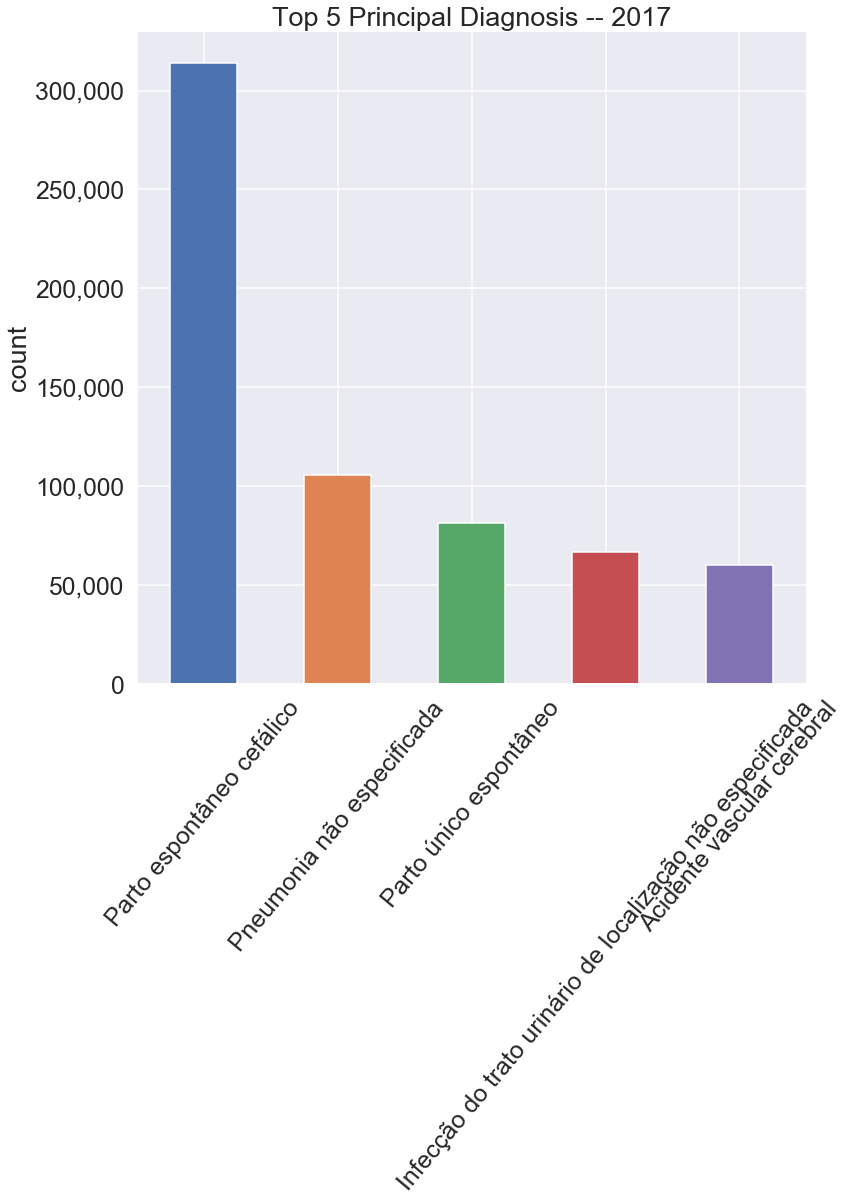

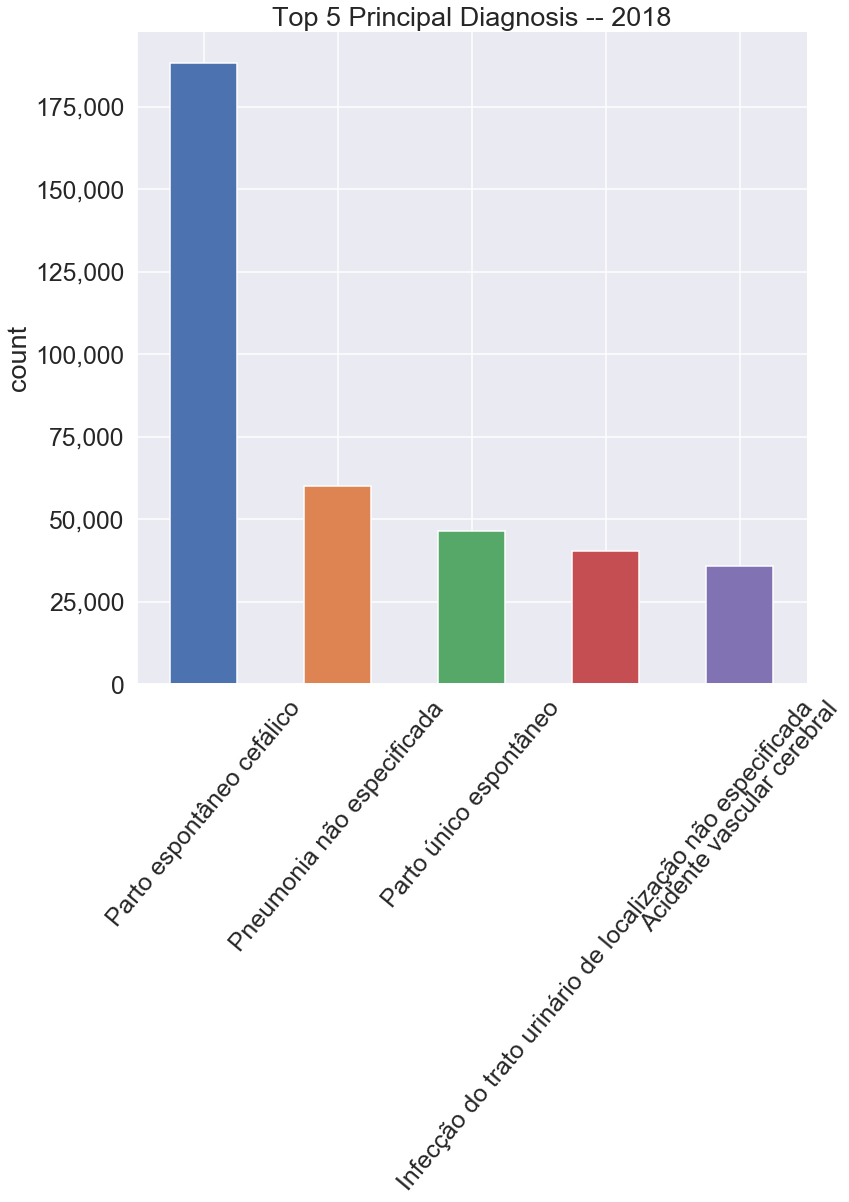

In [28]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DIAG_PRINC_DES', head = 5, 
                 title = 'Top 5 Principal Diagnosis -- 2018', xlabel = '', ylabel = 'count')

In [19]:
# Create counts of principal diagnosis and plot distribution

diag_princ_count = pd.DataFrame(diag_CID10.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2015 = pd.DataFrame(diag_2015.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2016 = pd.DataFrame(diag_2016.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2017 = pd.DataFrame(diag_2017.DIAG_PRINC_DES.value_counts()).reset_index()

diag_princ_count_2018 = pd.DataFrame(diag_2018.DIAG_PRINC_DES.value_counts()).reset_index()

In [23]:
print('Total Unique Diagnoses:',len(diag_princ_count))

Total Unique Diagnoses: 8721


The most common diagnosis is spontaneous cefalic births, pnemunia, unique spontaneous birth 

It seems that a common case is birth. However, it is worth noting that the list of diagnosis is long.There are 8,721 unique diagnosis spread over 16+M hospitalizations.

Text(0.5,0,'Log of Count')

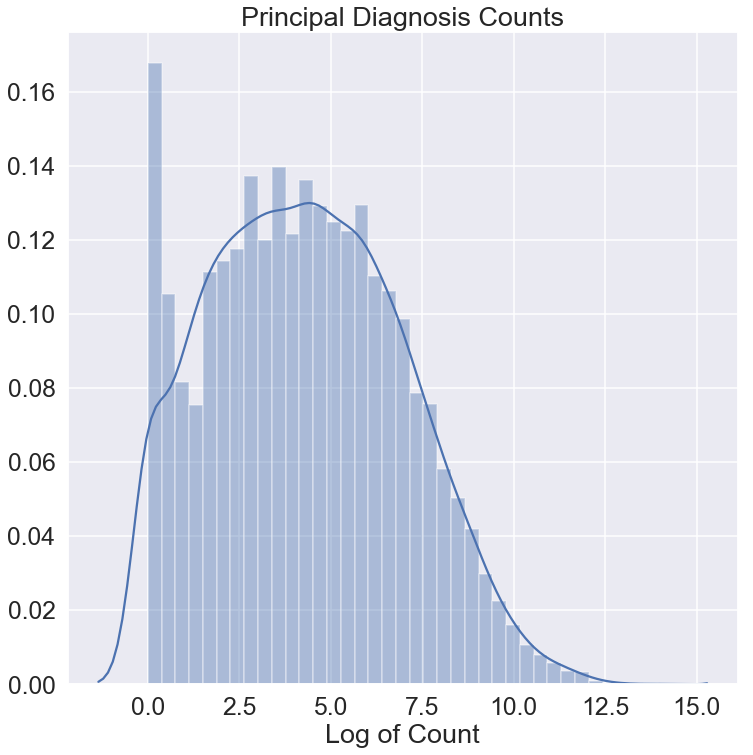

In [30]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(diag_princ_count['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts")

plt.xlabel('Log of Count')

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

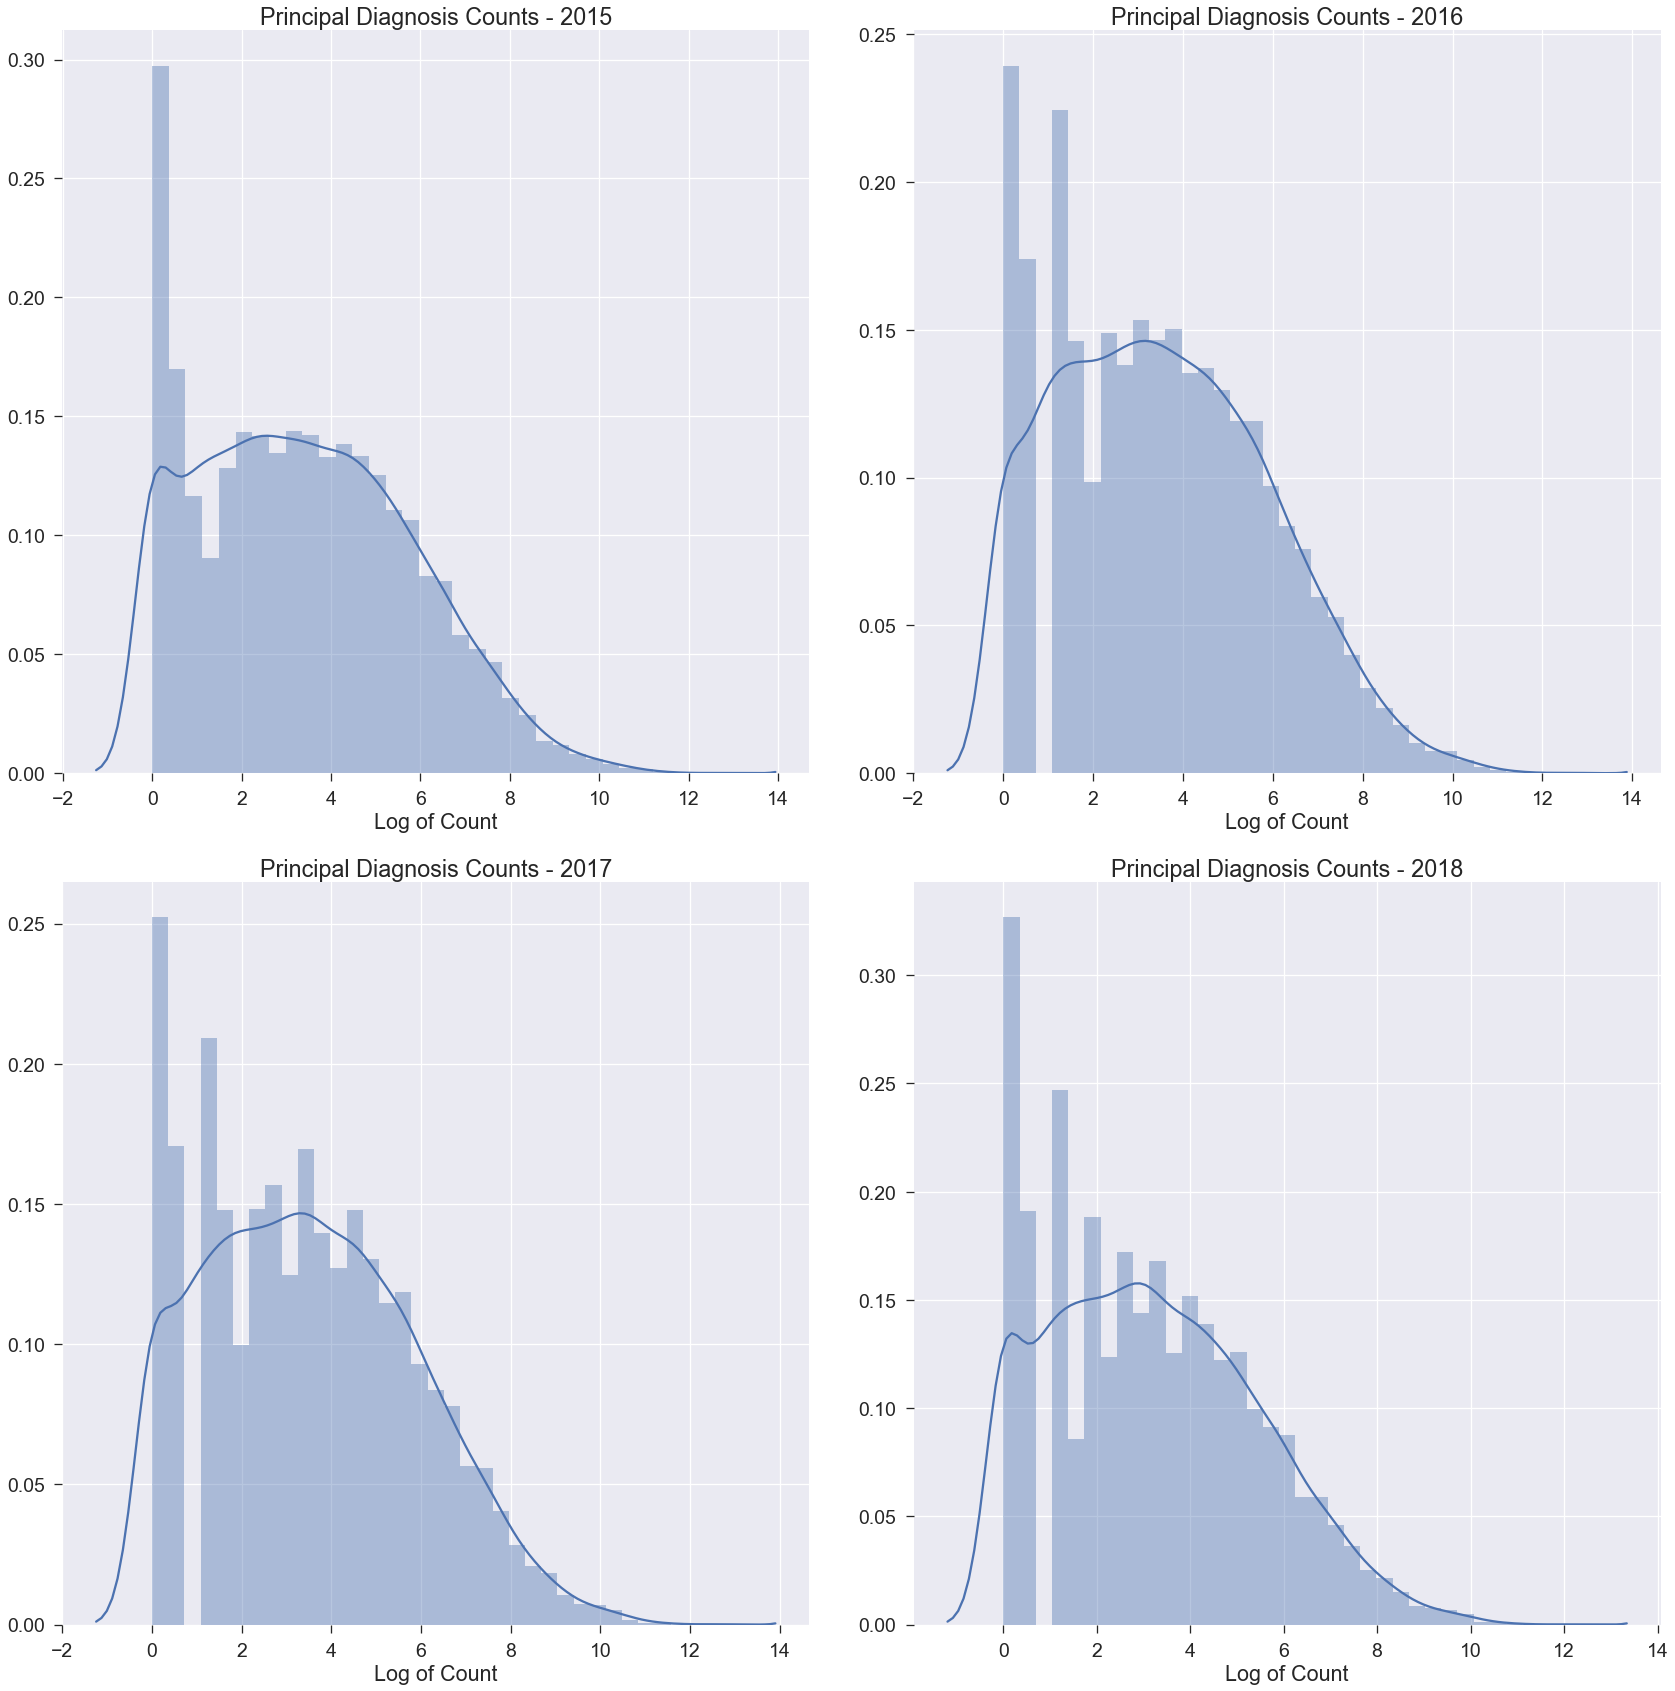

In [37]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(diag_princ_count_2015['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(diag_princ_count_2016['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(diag_princ_count_2017['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(diag_princ_count_2018['DIAG_PRINC_DES']))

plt.title("Principal Diagnosis Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout(rect=[2, 2, 4, 4])

** Normal Distribution Tests of the Diagnosis Counts**

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [32]:
# Normality Tests

norm_dist_tests(df = diag_princ_count, col_name = 'DIAG_PRINC_DES')

D’Agostino and Pearson’s:  NormaltestResult(statistic=26646.577497145663, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=2718.14696608574, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=8721, minmax=(1, 1132240), mean=1905.1519321178764, variance=253632849.63872597, skewness=45.6575732472053, kurtosis=2982.339869593929)


The normality and distribution tests suggest that the counts of the principal diagnosis variable are not normally distributed.

In [33]:
# ECDF

x, y = ecdf(diag_princ_count['DIAG_PRINC_DES'])

x_theor, y_theor = theor_ecdf(df = diag_princ_count, col_name = 'DIAG_PRINC_DES', seed = 42)

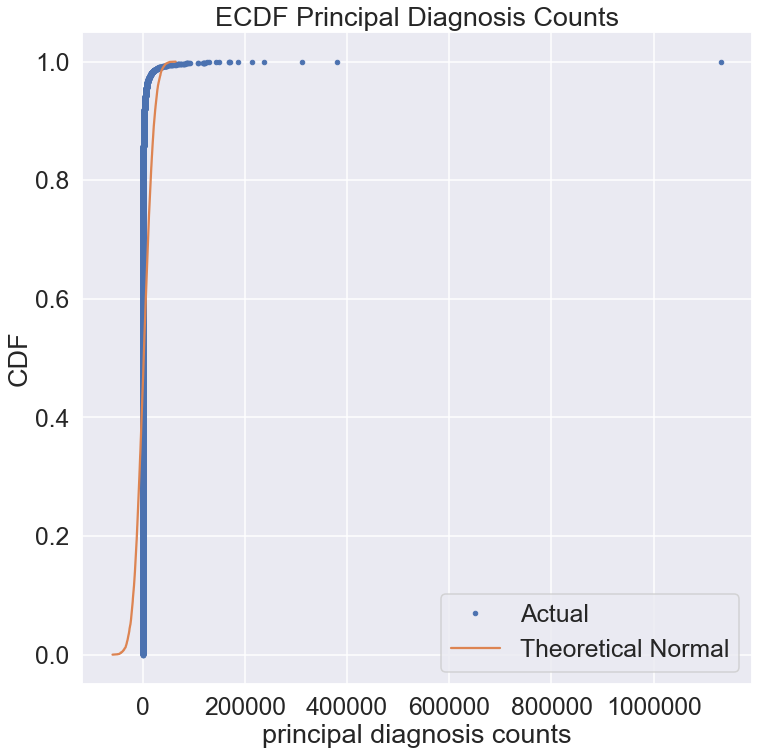

In [34]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Principal Diagnosis Counts")

plt.xlabel("principal diagnosis counts")

plt.ylabel('CDF')

plt.show()

The actual distribution does not follow the theoretical normal distribution for the most part.

**Hypothesis Testing:** *Bootstrap Replicates*

> H0: Population mean is 1,905 diagnoses

> Ha: Population mean is not 1,905 diagnoses

> alpha = 0.05

In [24]:
#Calculate counts mean

diag_count_mean = np.mean(diag_princ_count['DIAG_PRINC_DES'])

diag_count_mean

1905.1519321178764

In [35]:
# Replicates

%time

n_tries = 10000

diag_mean_replicates = bs_sample(diag_princ_count['DIAG_PRINC_DES'], np.mean, size = n_tries)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


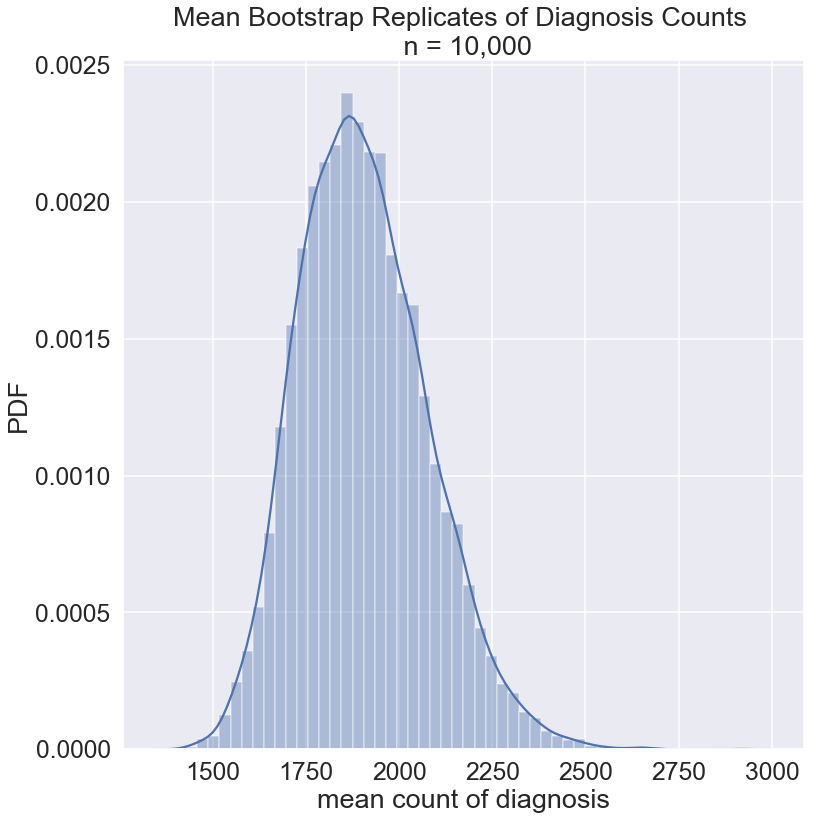

In [36]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis')

plt.title("Mean Bootstrap Replicates of Diagnosis Counts \n n = 10,000")

plt.tight_layout()

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 39.7

In [38]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_mean_replicates, 
              mean = diag_count_mean)

Bootstrap Mean Replicates 95% CI:  [1607.78629171 2273.44585483]
P-value of patient age mean replicates:  0.5309


The bootstrap mean replicates shows a 95% confidence interval for diagnosis counts is between 1,607 and 2,273. This is a wide interval.This range contains our sample mean of 1,905. The p-value is 0.43 which is above the alpha level of 0.05, this means we cannot reject the hypothesis that the mean age is 1,905 cases per diagnosis.

**Hypothesis Testing:** *One Sample T-Test*

> H0: Population mean is 1,905 diagnoses

> Ha: Population mean is not 1,905 diagnoses

> alpha = 0.05

In [39]:
# One-sided t-test

stats.ttest_1samp(diag_princ_count.DIAG_PRINC_DES, diag_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

The p-value is above the alpha level of 0.05. This suggets that we cannot reject the null hypothesis that the population mean is 1,905.

### Variable: `Principal Diagnosis Chapter`

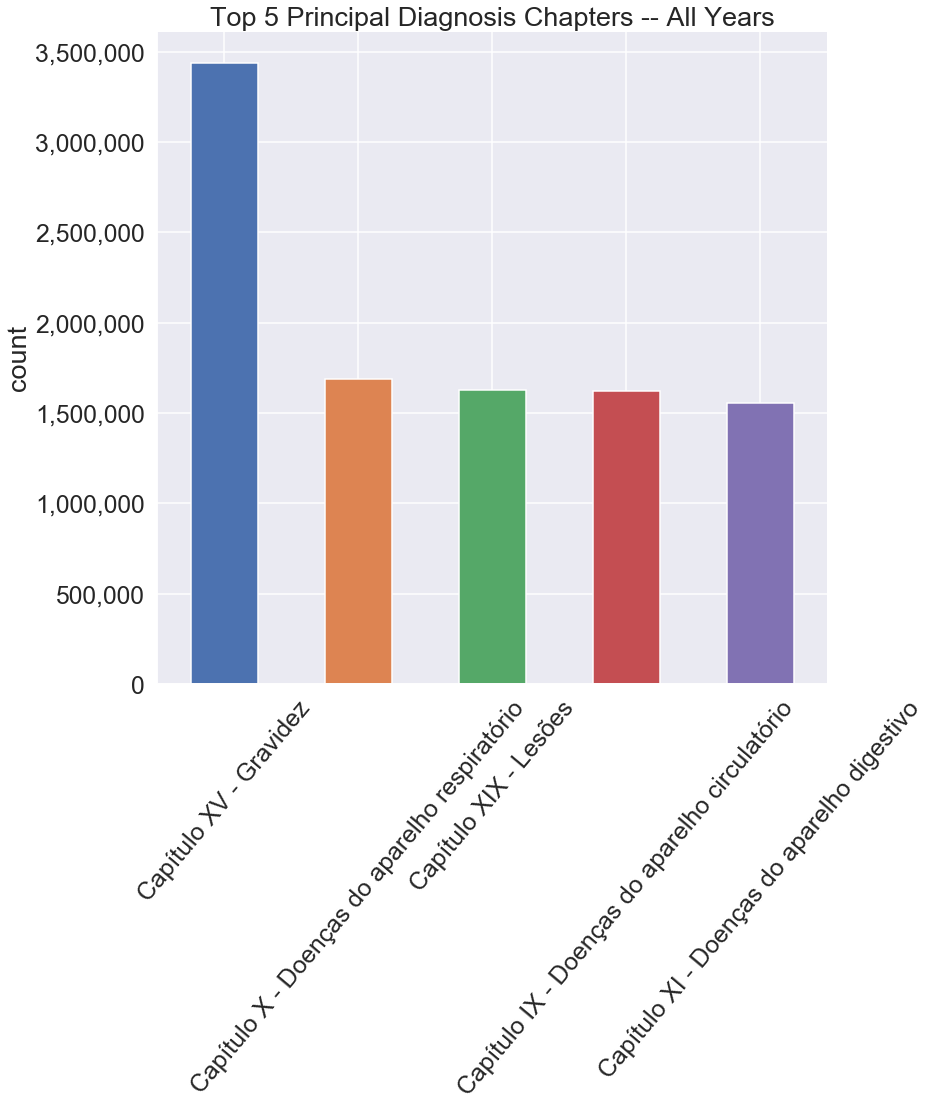

In [40]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- All Years', xlabel = '', ylabel = 'count')

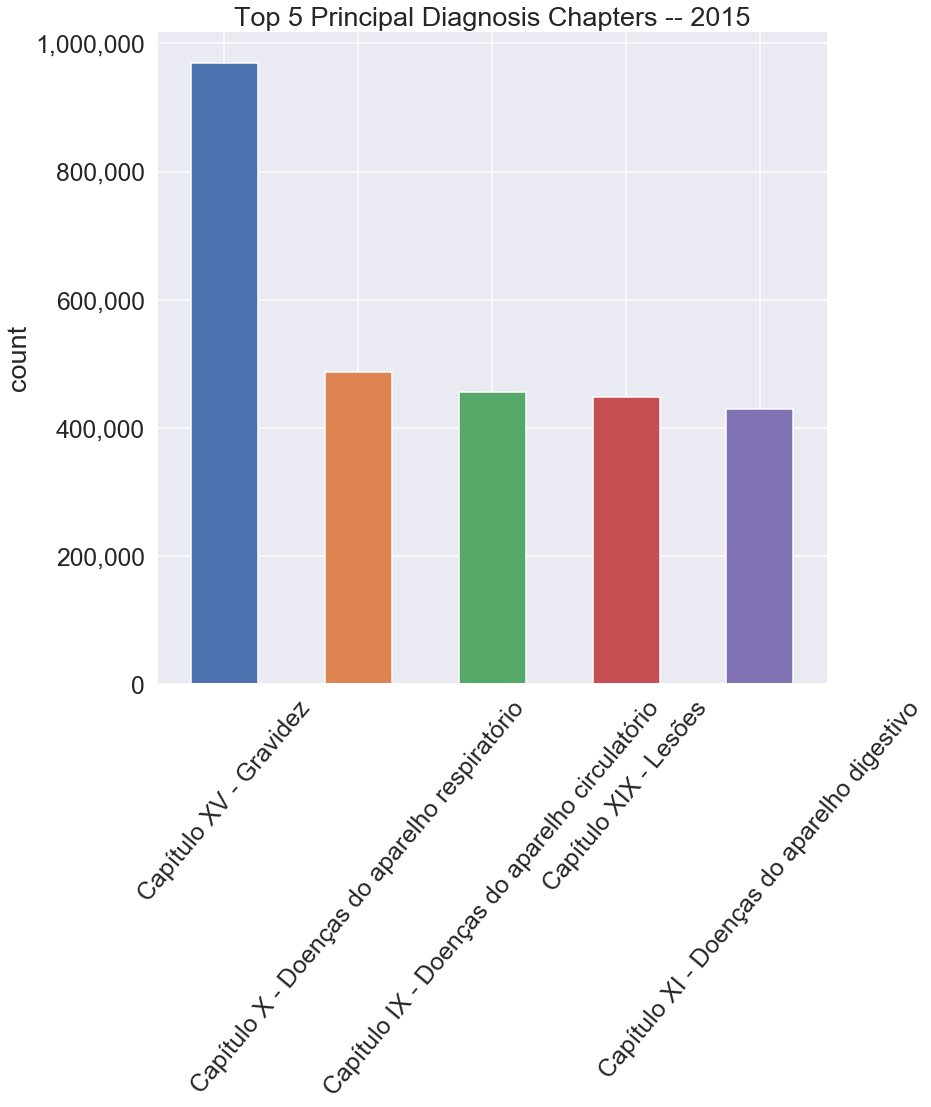

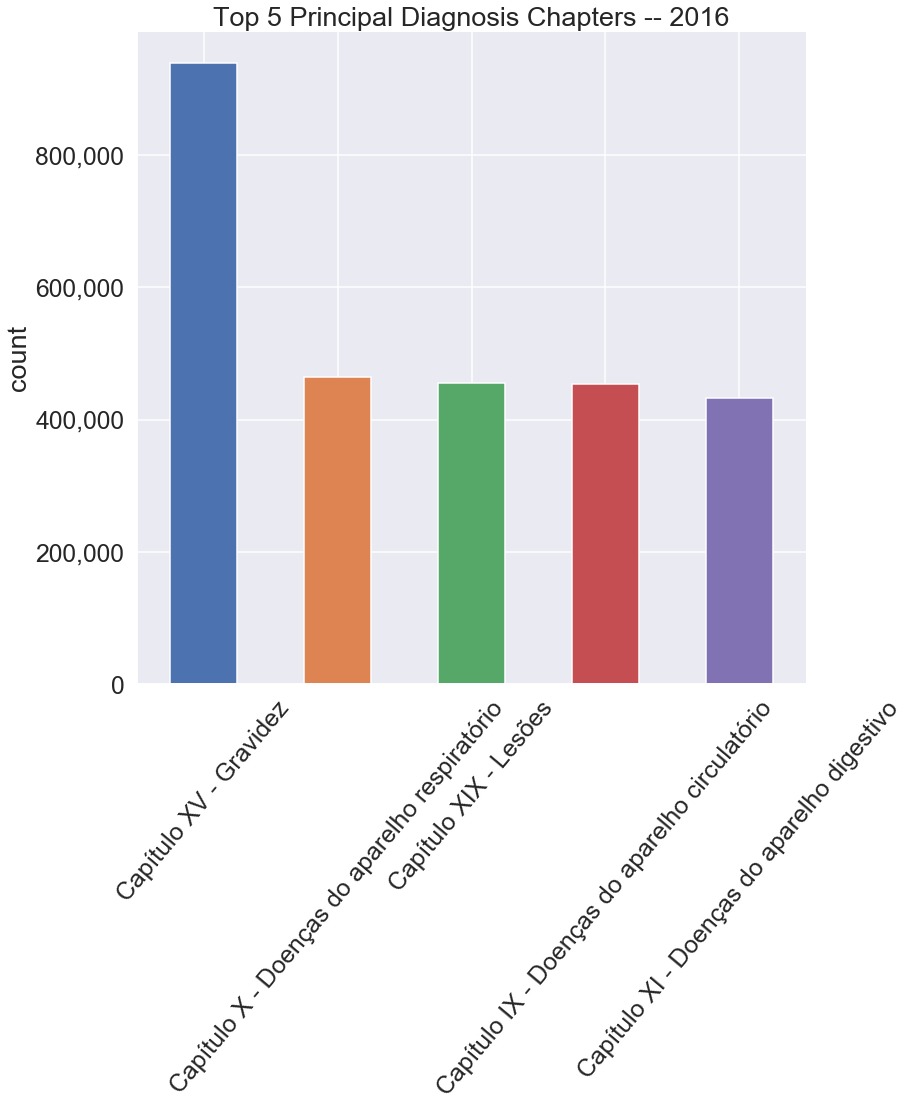

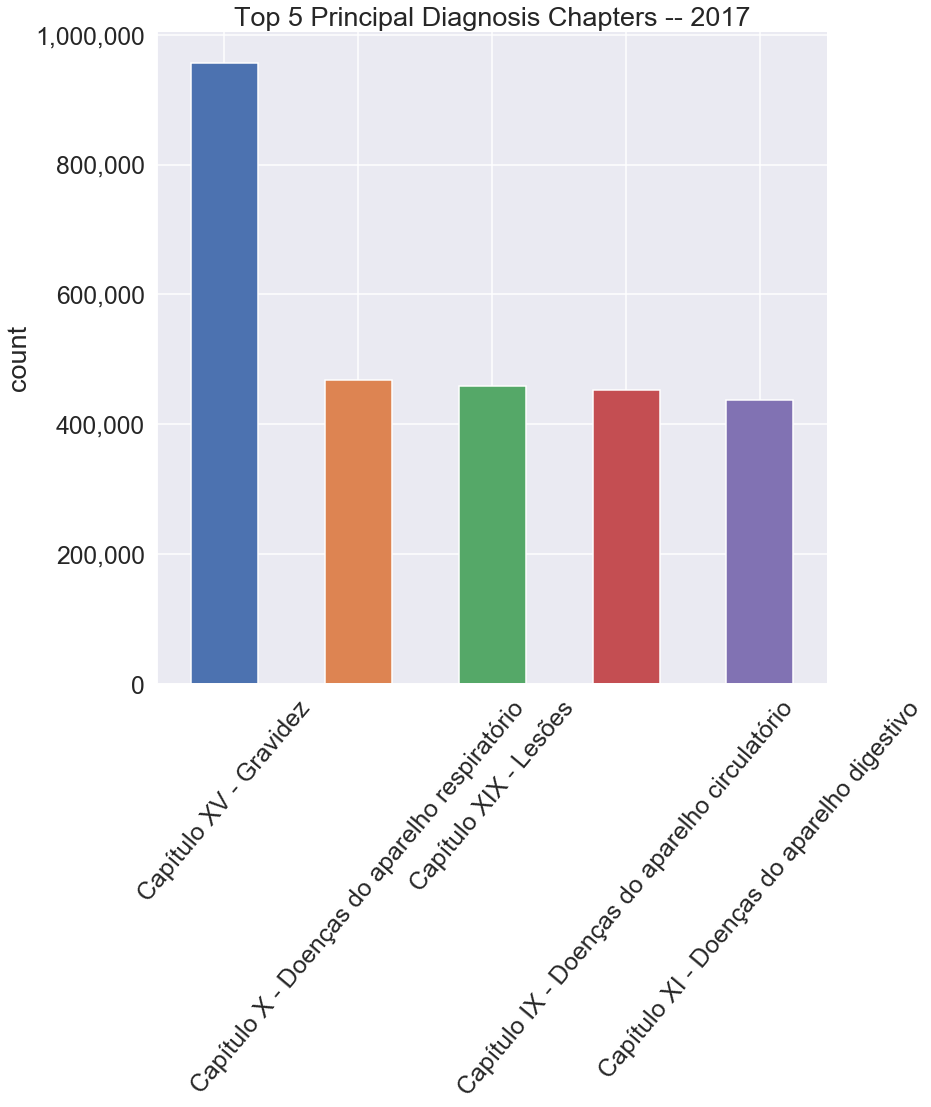

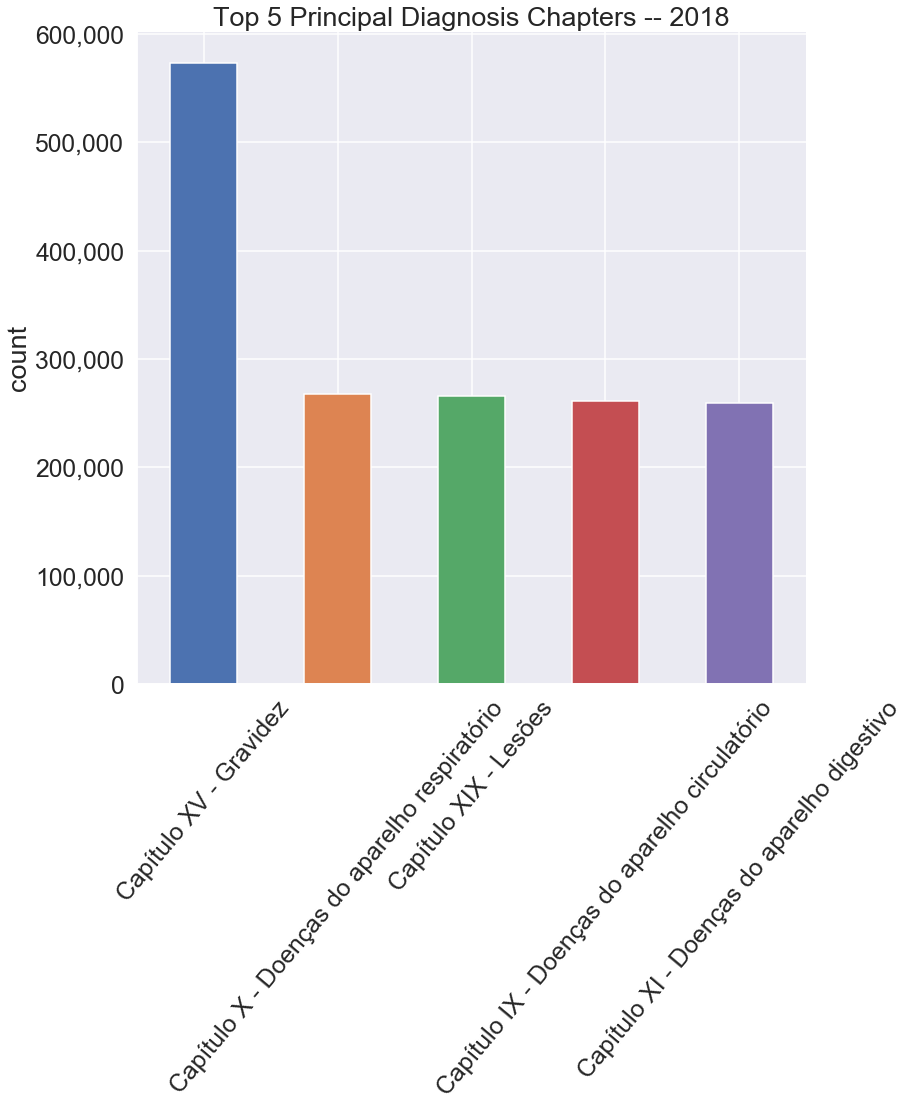

In [41]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DES_CAP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Chapters -- 2018', xlabel = '', ylabel = 'count')

In [26]:
# Create counts of principal diagnosis and plot distribution

diag_chap_count = pd.DataFrame(diag_CID10.DES_CAP.value_counts()).reset_index()

diag_chap_count_2015 = pd.DataFrame(diag_2015.DES_CAP.value_counts()).reset_index()

diag_chap_count_2016 = pd.DataFrame(diag_2016.DES_CAP.value_counts()).reset_index()

diag_chap_count_2017 = pd.DataFrame(diag_2017.DES_CAP.value_counts()).reset_index()

diag_chap_count_2018 = pd.DataFrame(diag_2018.DES_CAP.value_counts()).reset_index()

In [28]:
diag_chap_count

index  DES_CAP
0                              Capítulo XV - Gravidez  3438854
1       Capítulo X - Doenças do aparelho respiratório  1687929
2                               Capítulo XIX - Lesões  1628304
3      Capítulo IX - Doenças do aparelho circulatório  1622716
4         Capítulo XI - Doenças do aparelho digestivo  1558606
5   Capítulo I - Algumas doenças infecciosas e par...  1135365
6    Capítulo XIV - Doenças do aparelho geniturinário  1132084
7                  Capítulo II - Neoplasias [tumores]  1113542
8   Capítulo V - Transtornos mentais e comportamen...   547177
9   Capítulo XVI - Algumas afecções originadas no ...   385634
10  Capítulo XII - Doenças da pele e do tecido sub...   359660
11                   Capítulo IV - Doenças endócrinas   352362
12  Capítulo XXI - Fatores que influenciam o estad...   328253
13           Capítulo VI - Doenças do sistema nervoso   324632
14  Capítulo XIII - Doenças do sistema osteomuscul...   299629
15                          Capítulo XVIII - Sintomas   259193
16            Capítulo VII - Doenças do olho e anexos   155166
17  Capítulo III  - Doenças do sangue e dos órgãos...   141372
18            Capítulo XVII - Malformações congênitas   116735
19  Capítulo VIII - Doenças do ouvido e da apófise...    27606
20  Capítulo XXII - Códigos para propósitos especiais       11

+ The most common chapters are gravity, respiratory illneses, lessions, circulatory problems and digestve problems.
+ This pattern repeats for all the years in the sample.

### **Variable:** `Principal Diagnosis Group`

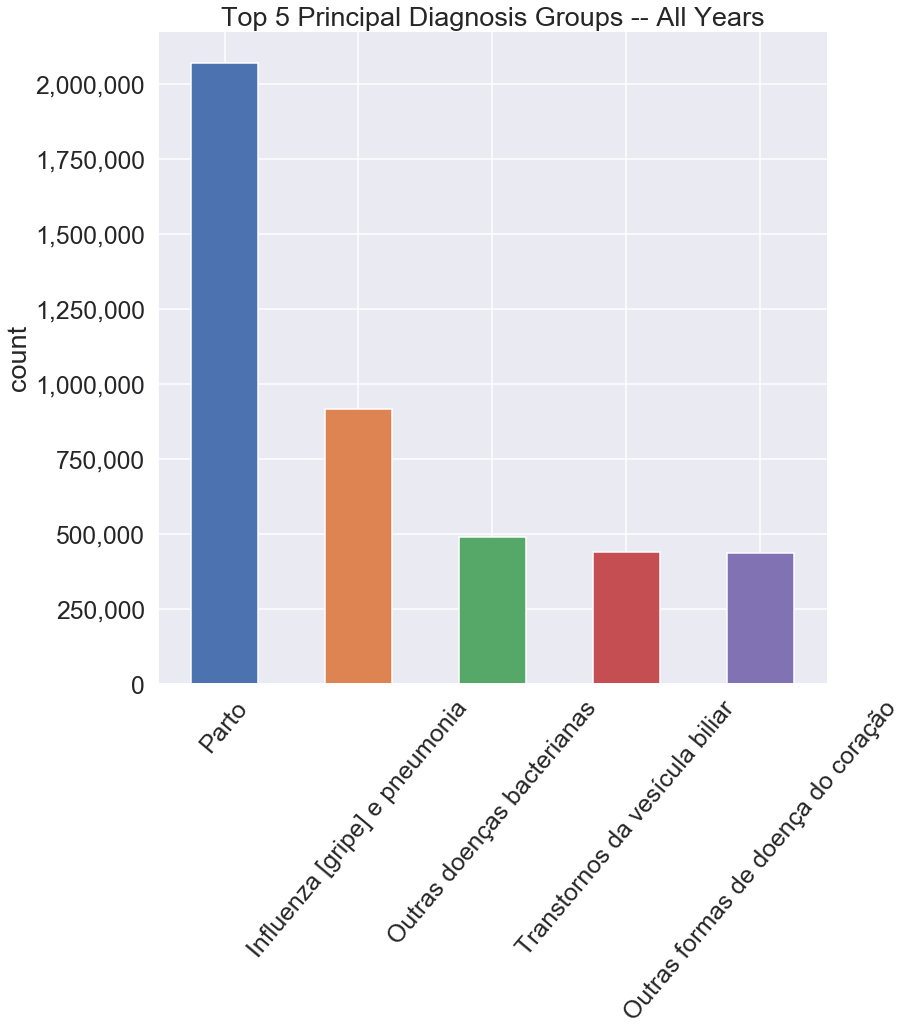

In [53]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- All Years', xlabel = '', ylabel = 'count')

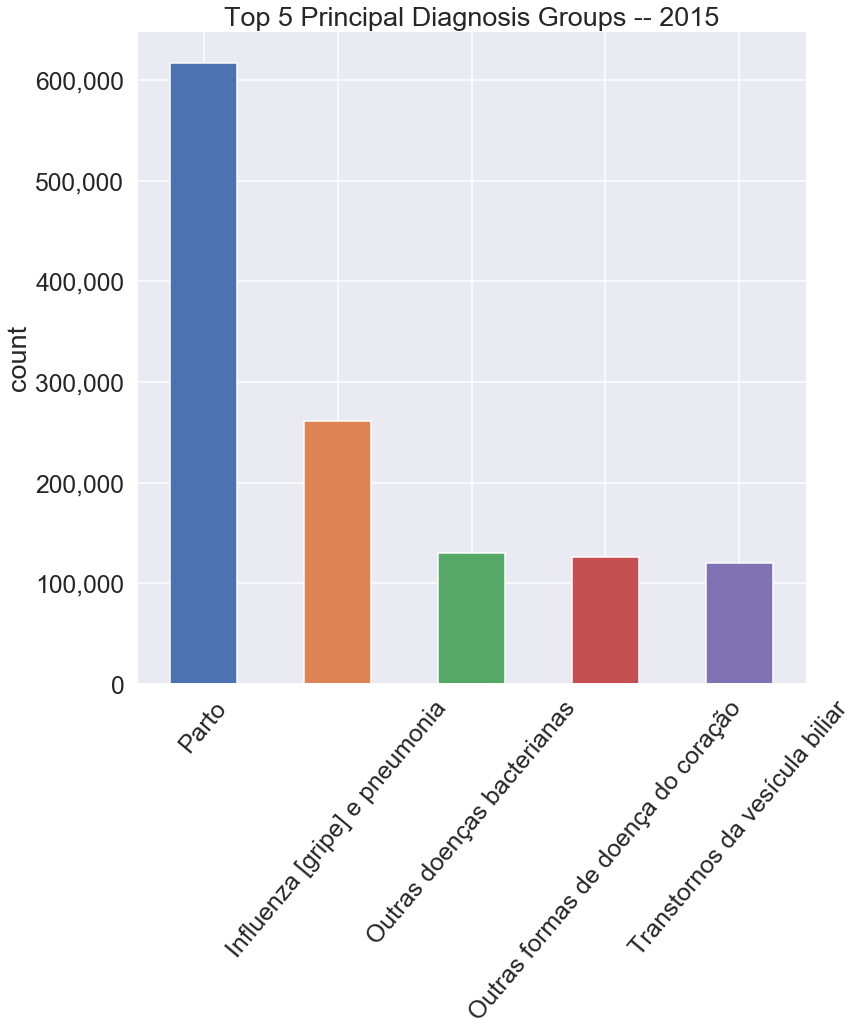

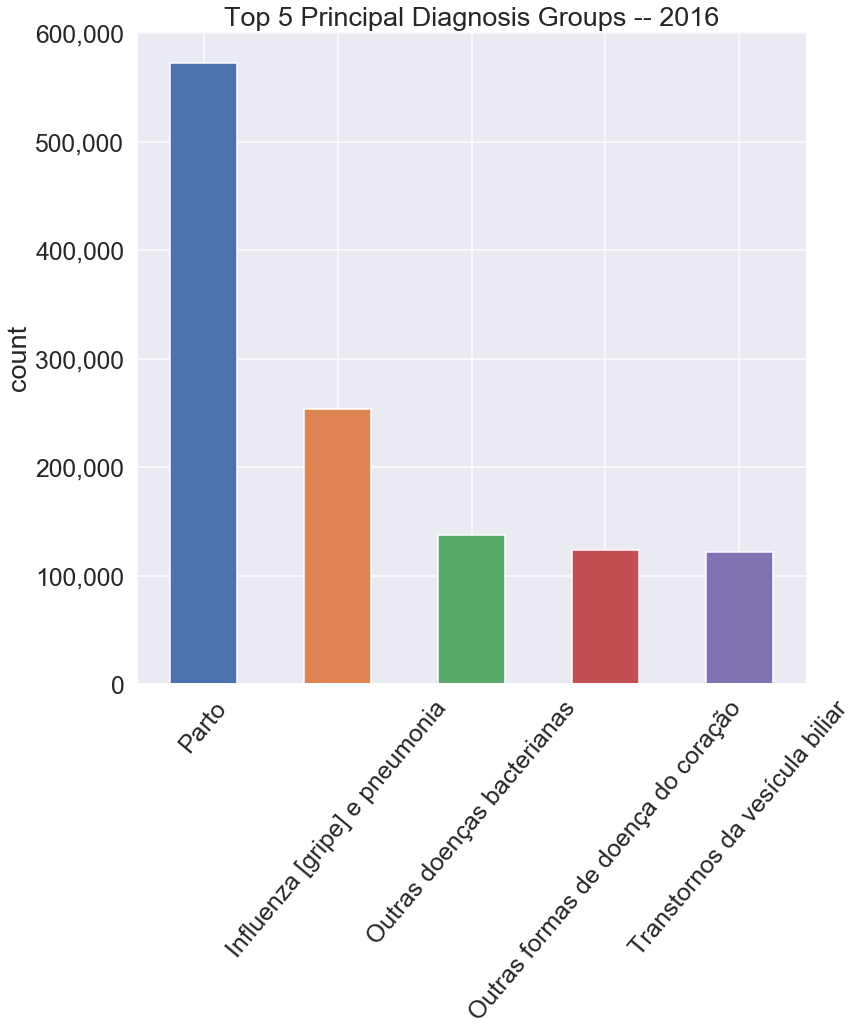

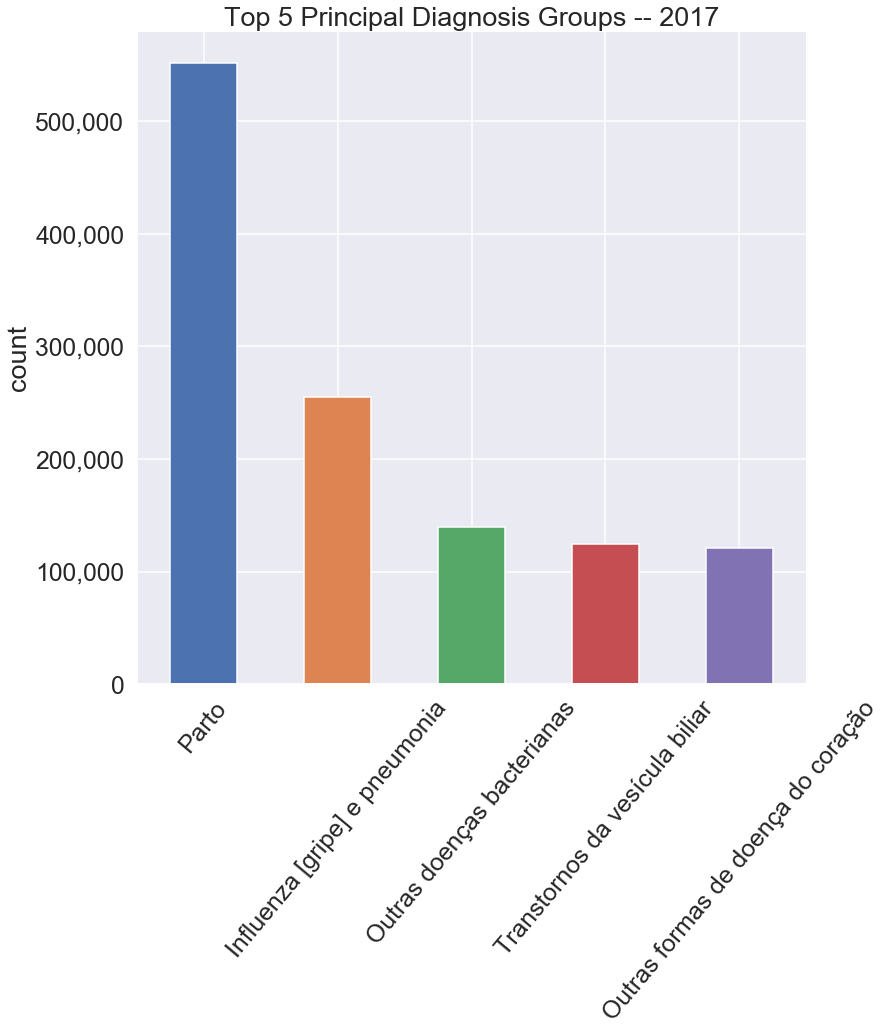

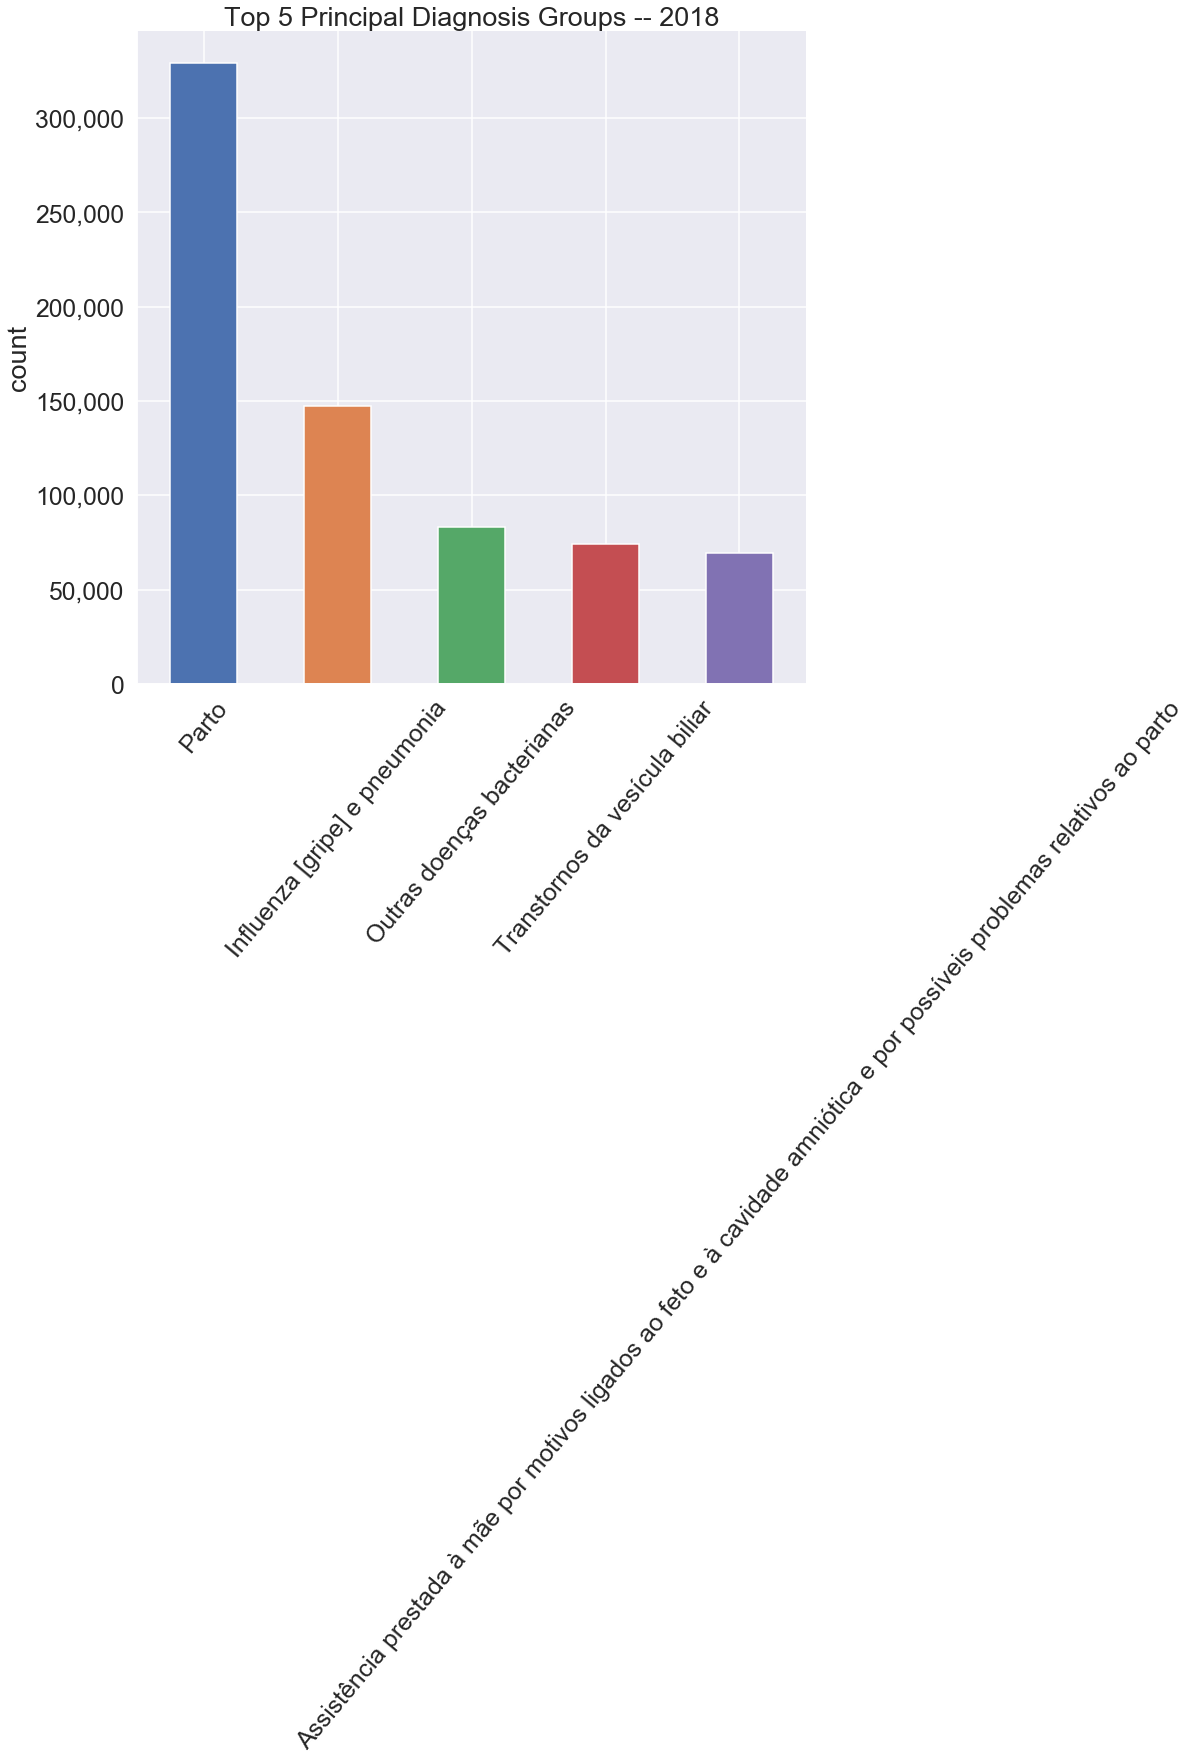

In [54]:
# Top diagnoses groups by year

count_plot_slice(df = diag_2015, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DES_GRP', head = 5, 
                 title = 'Top 5 Principal Diagnosis Groups -- 2018', xlabel = '', ylabel = 'count')

In [35]:
# Create counts of principal diagnosis and plot distribution

diag_grp_count = pd.DataFrame(diag_CID10.DES_GRP.value_counts()).reset_index()

diag_grp_count_2015 = pd.DataFrame(diag_2015.DES_GRP.value_counts()).reset_index()

diag_grp_count_2016 = pd.DataFrame(diag_2016.DES_GRP.value_counts()).reset_index()

diag_grp_count_2017 = pd.DataFrame(diag_2017.DES_GRP.value_counts()).reset_index()

diag_grp_count_2018 = pd.DataFrame(diag_2018.DES_GRP.value_counts()).reset_index()

In [33]:
print('Total Unique Group Diagnoses:',len(diag_grp_count))

Total Unique Group Diagnoses: 264


The most common diagnosis is group are birth, pnemunia, bacterial diseases, heart disease, and gallblader issues. It is worth norting that there are groups in which cases are very rare. See tail of groups below.

In [36]:
diag_grp_count.tail(10)

index  DES_GRP
254                  Afogamento e submersão acidentais        6
255  Ocupante de triciclo motorizado traumatizado e...        5
256  Pedestre traumatizado em um acidente de transp...        5
257                   Acidentes de transporte por água        3
258  Exposição acidental a outros fatores e aos não...        3
259  Designação provisória de novas doenças de etio...        3
260  Outros acidentes de transporte e os não especi...        2
261  Ocupante de um ônibus traumatizado em um acide...        2
262  Ocupante de uma caminhonete traumatizado em um...        1
263          Intervenções legais e operações de guerra        1

Text(0.5,0,'Log of Count')

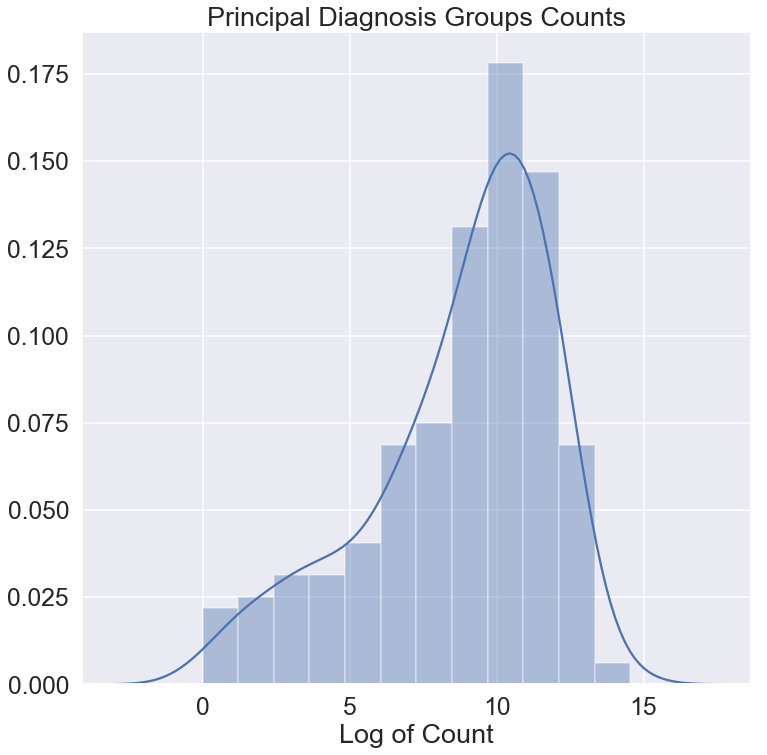

In [56]:
# Plot diagnosis variable counts - - All Years/Total

sns.distplot(np.log(diag_grp_count['DES_GRP']))

plt.title("Principal Diagnosis Groups Counts")

plt.xlabel('Log of Count')

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

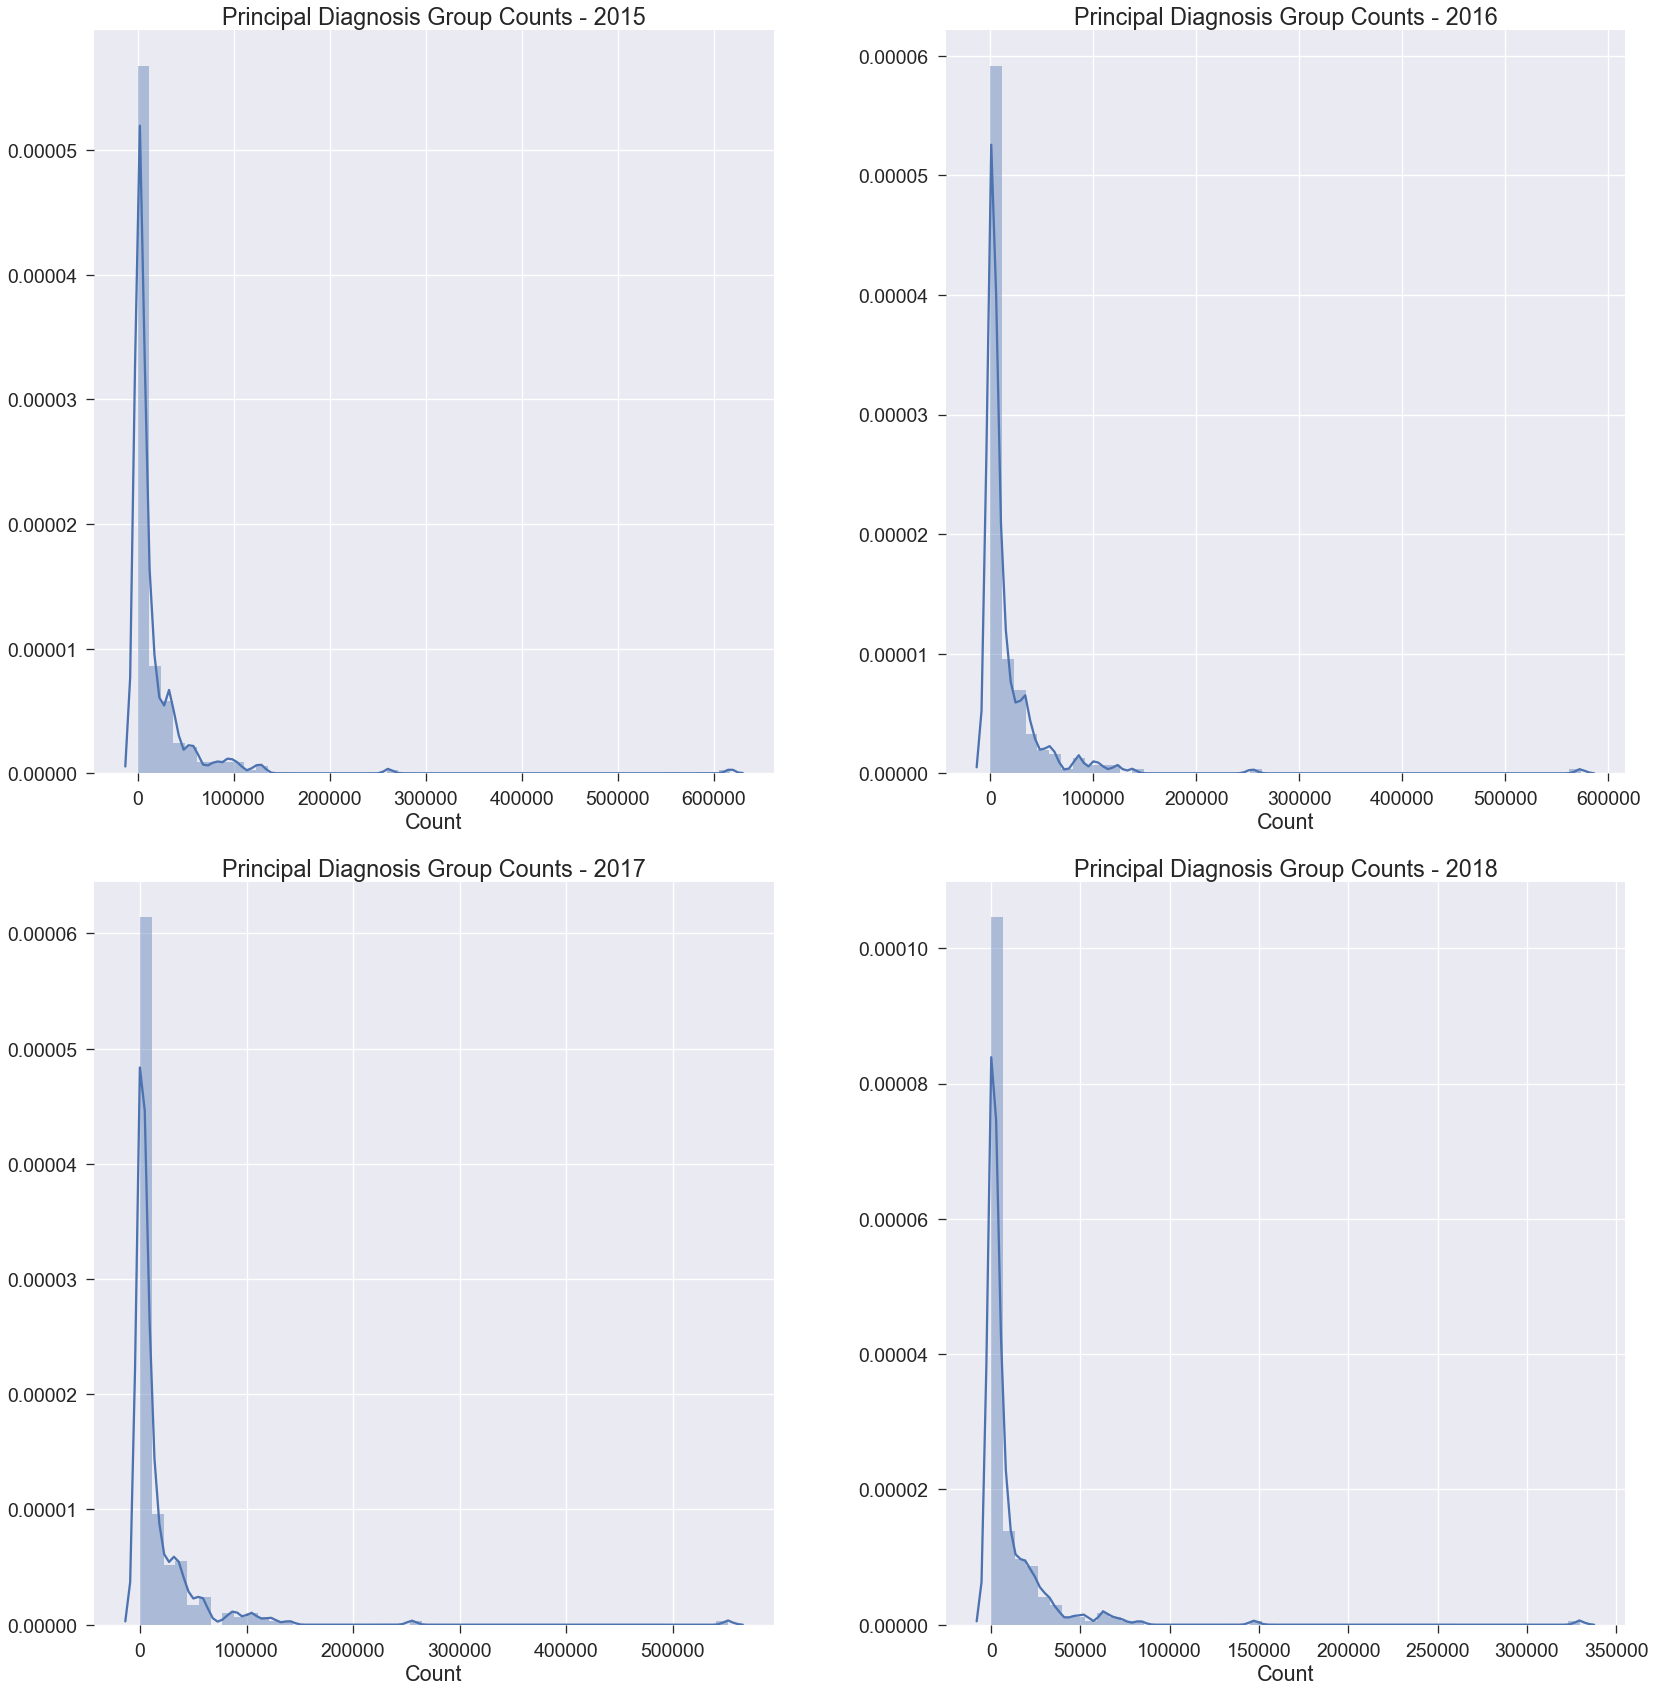

In [36]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(diag_grp_count_2015['DES_GRP'])

plt.title("Principal Diagnosis Group Counts - 2015")

plt.xlabel('Count')

plt.subplot(222)

sns.distplot(diag_grp_count_2016['DES_GRP'])

plt.title("Principal Diagnosis Group Counts - 2016")

plt.xlabel('Count')

plt.subplot(223)

sns.distplot(diag_grp_count_2017['DES_GRP'])

plt.title("Principal Diagnosis Group Counts - 2017")

plt.xlabel('Count')

plt.subplot(224)

sns.distplot(diag_grp_count_2018['DES_GRP'])

plt.title("Principal Diagnosis Group Counts - 2018")

plt.xlabel('Count')

plt.tight_layout(rect=[2, 2, 4, 4])

The distribution of diagnosis groups is highly skewed throughout all years.

** Normal Distribution Tests of the Diagnosis Groups Counts**

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [58]:
# Normality Tests

norm_dist_tests(df = diag_grp_count, col_name = 'DES_GRP')

D’Agostino and Pearson’s:  NormaltestResult(statistic=429.30077429380265, pvalue=6.005114930836989e-94)
Anderson-Darling:  AndersonResult(statistic=44.31093938701372, critical_values=array([0.568, 0.646, 0.776, 0.905, 1.076]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=264, minmax=(1, 2071585), mean=62912.193181818184, variance=25861691319.19068, skewness=8.350473598356123, kurtosis=93.72286067941431)


The normality and distribution tests suggest that the counts of the principal diagnosis groups variable are not normally distributed.

In [56]:
# ECDF

x, y = ecdf(diag_grp_count['DES_GRP'])

x_theor, y_theor = theor_ecdf(df = diag_grp_count, col_name = 'DES_GRP', seed = 42)

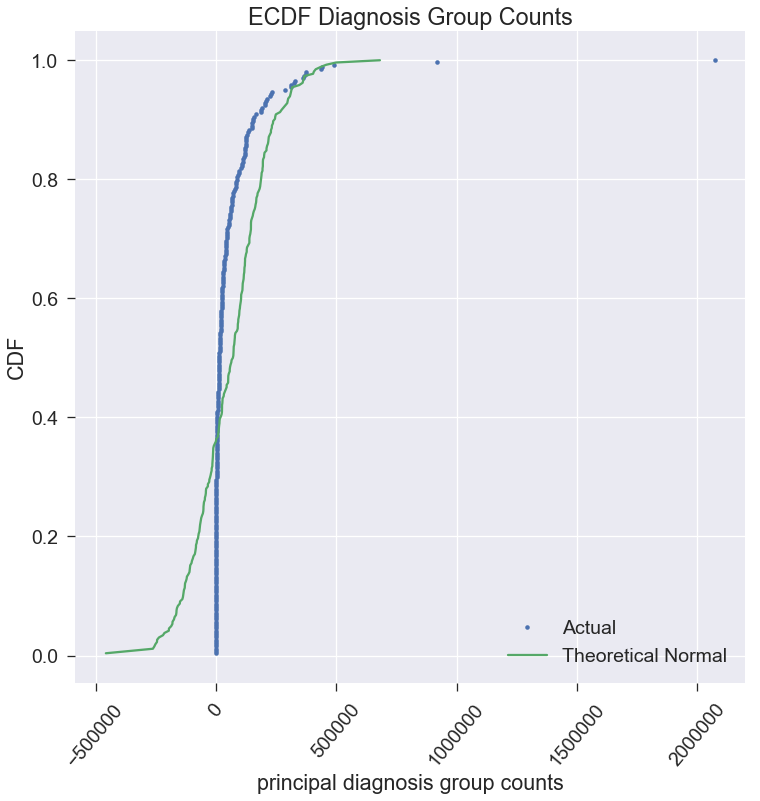

In [57]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Diagnosis Group Counts")

plt.xlabel("principal diagnosis group counts")

plt.xticks(rotation = 50)

plt.ylabel('CDF')

plt.show()

The distribution of principal diagnosis counts does not follow a theoretical normal distribution at all.

**Hypothesis Testing:** *Bootstrap Replicates*

> H0: Population mean is 62,912 diagnoses group counts

> Ha: Population mean is not 1,905 diagnoses group counts

> alpha = 0.05

In [58]:
#Calculate counts mean

diag_grp_count_mean = np.mean(diag_grp_count['DES_GRP'])

diag_grp_count_mean

62912.193181818184

In [61]:
# Replicates

%time

n_tries = 10000

diag_grp_mean_replicates = bs_sample(diag_grp_count['DES_GRP'], np.mean, size = n_tries)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.82 µs


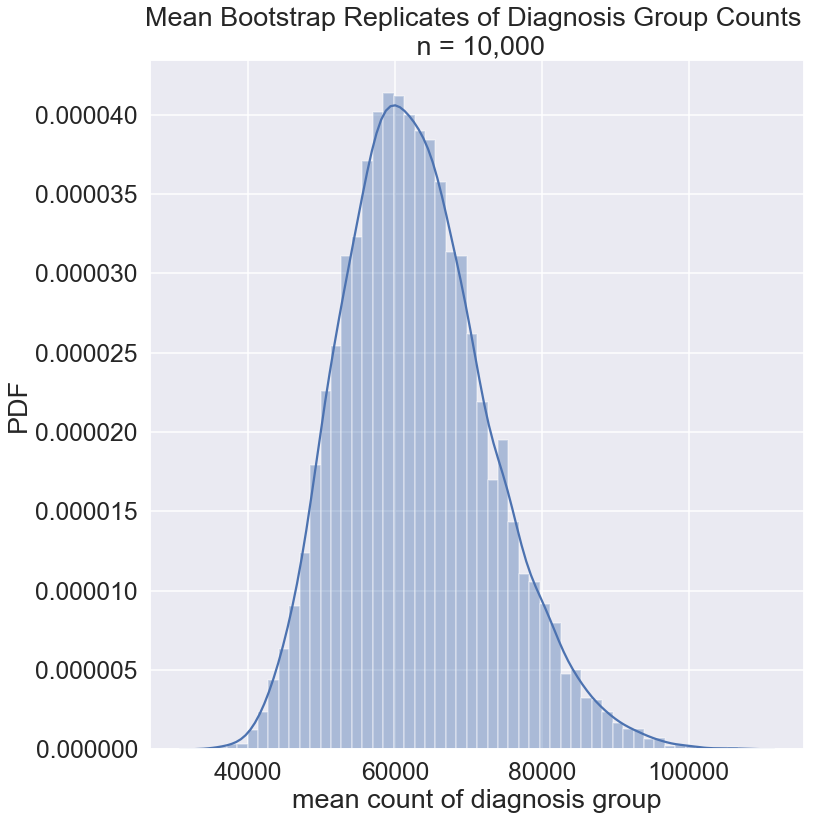

In [62]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_grp_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis group')

plt.title("Mean Bootstrap Replicates of Diagnosis Group Counts \n n = 10,000")

plt.tight_layout()

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 39.7

In [64]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_grp_mean_replicates, 
              mean = diag_grp_count_mean)

Bootstrap Mean Replicates 95% CI:  [46009.5217803  84638.17301136]
P-value of patient age mean replicates:  0.5302


The bootstrap mean replicates shows a 95% confidence interval for diagnosis counts is between 46,009 and 84,638. This is a wide interval.This range contains our sample mean of 62,912. The p-value is 0.43 which is above the alpha level of 0.05, this means we cannot reject the hypothesis that the mean age is 62,912 cases per group.

**Hypothesis Testing:** *One Sample T-Test*

> H0: Population mean is 62,912 diagnoses group counts

> Ha: Population mean is not 1,905 diagnoses group counts

> alpha = 0.05

In [65]:
# One-sided t-test

stats.ttest_1samp(diag_grp_count.DES_GRP, diag_grp_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

The p-value is above the alpha level of 0.05. This suggests that we cannot reject the null hypothesis that the population mean is 62,912 cases per group.

### **Variable:** `Principal Diagnosis Category`

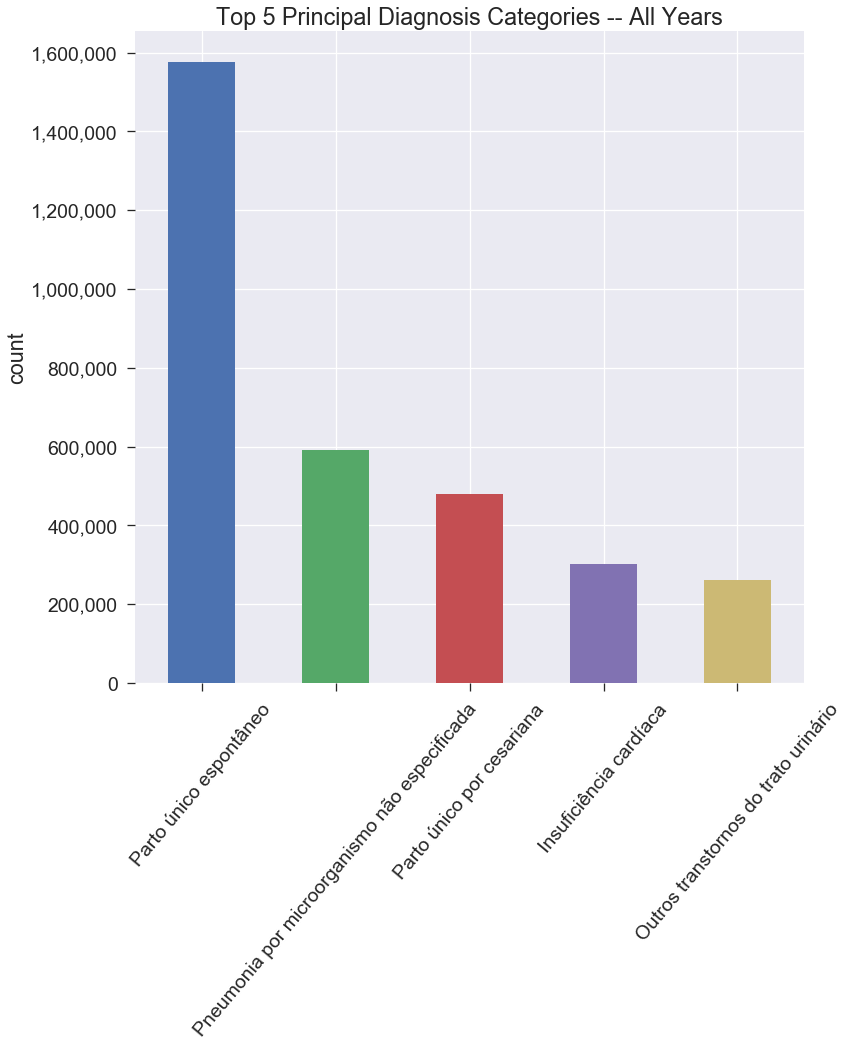

In [30]:
#Plot Top principal diagnoses

count_plot_slice(df = diag_CID10, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- All Years', xlabel = '', ylabel = 'count')

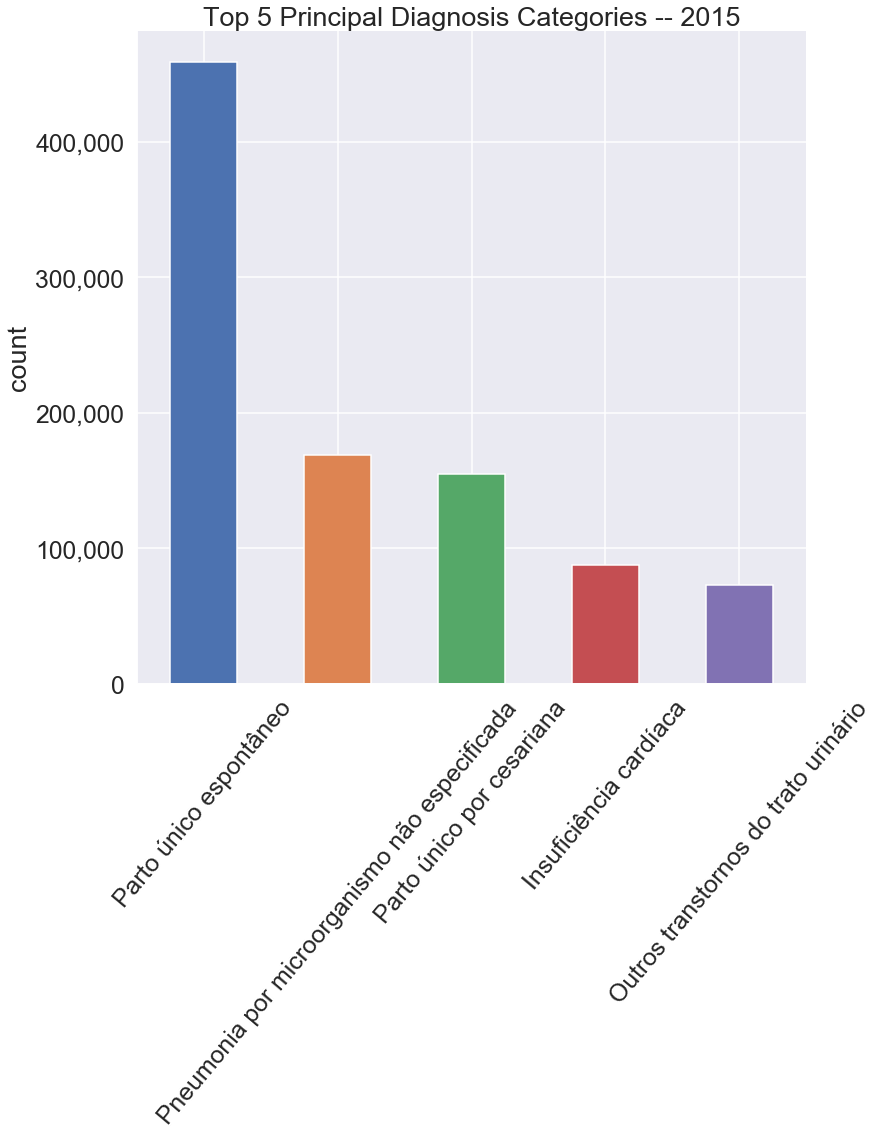

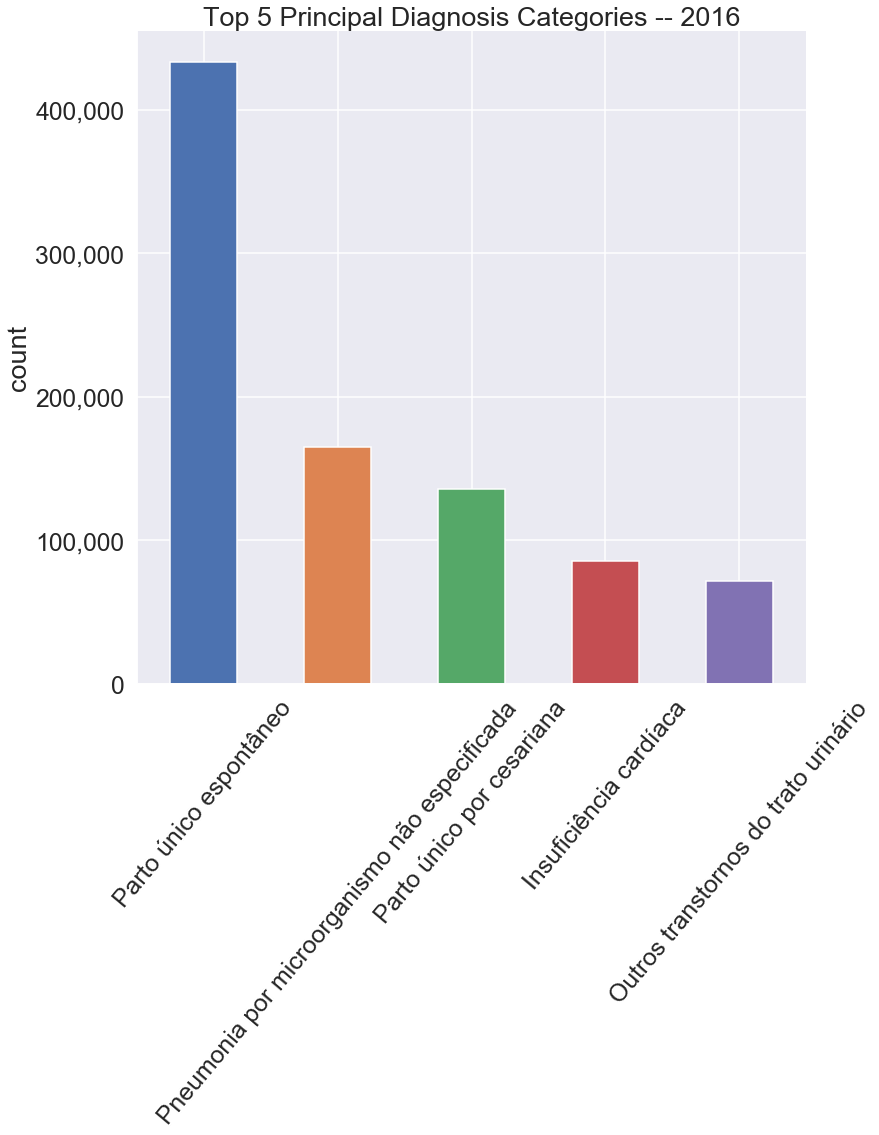

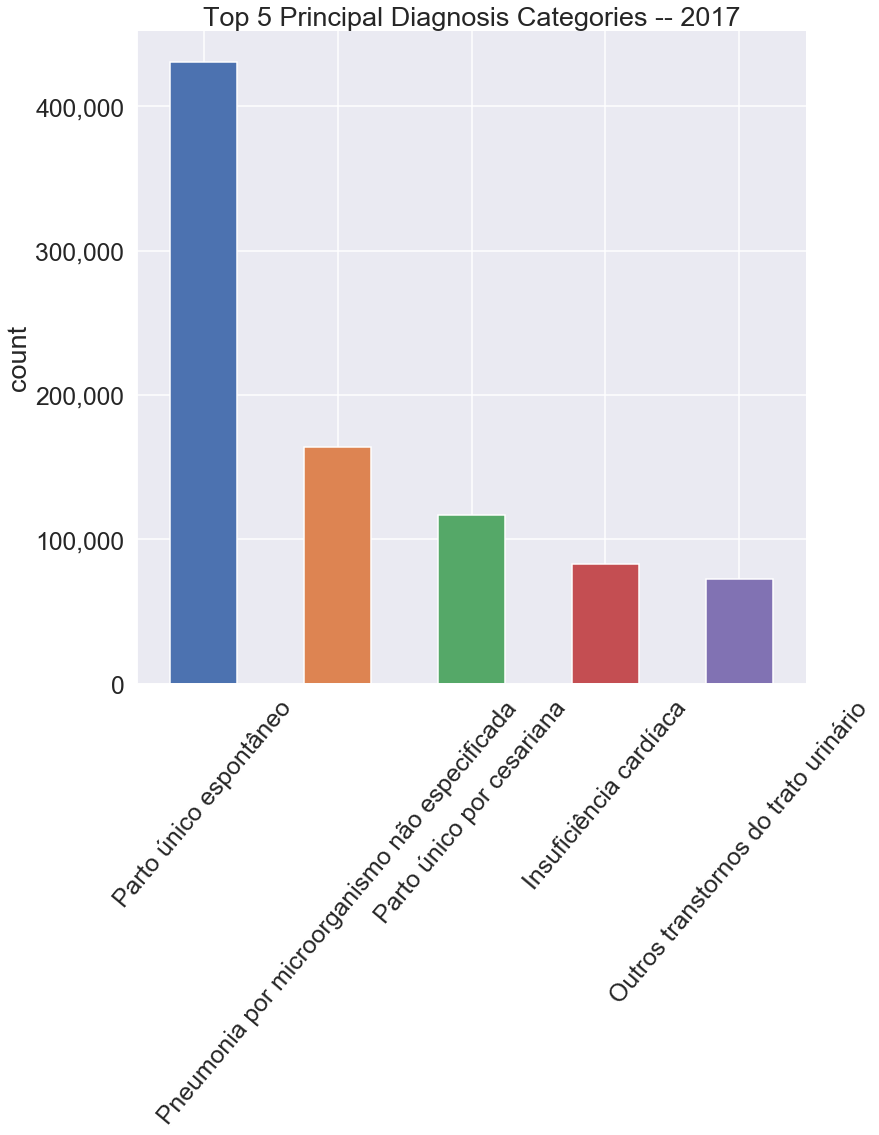

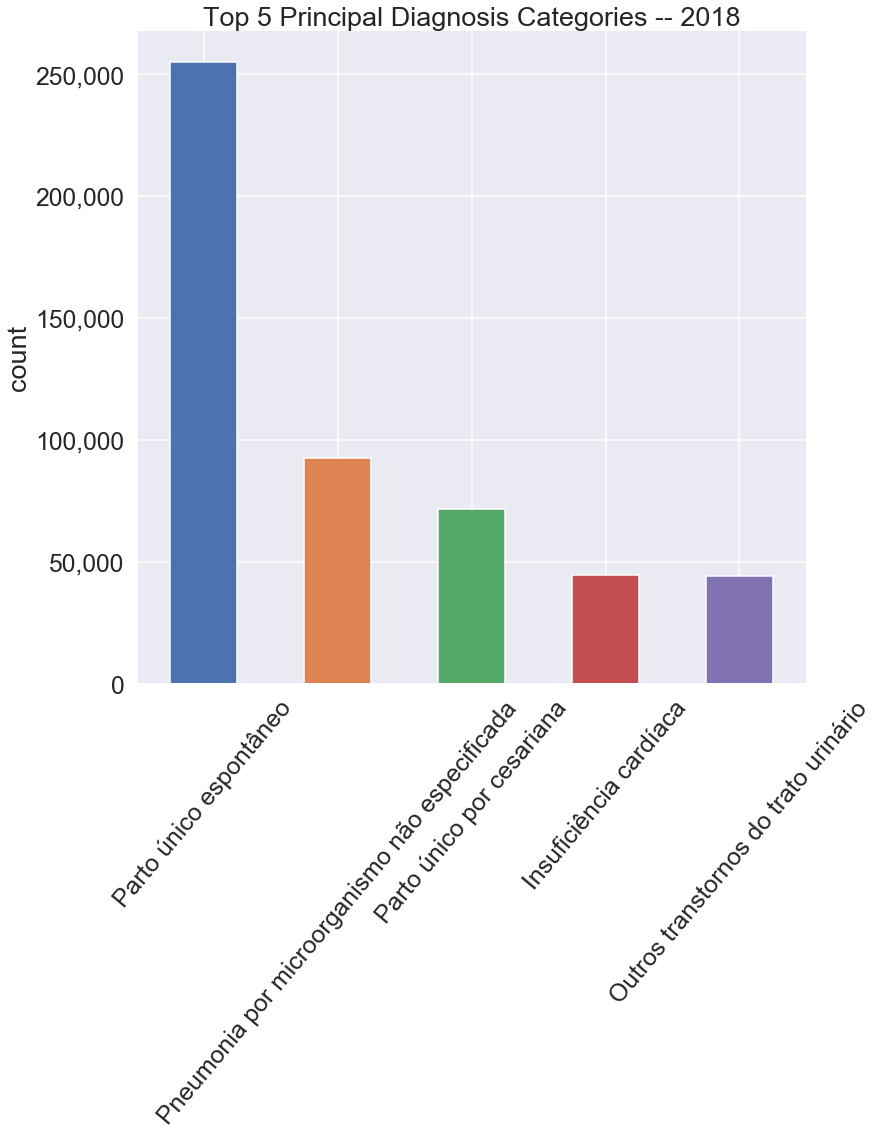

In [67]:
# Top diagnoses by year

count_plot_slice(df = diag_2015, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2015', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2016, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2016', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2017, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2017', xlabel = '', ylabel = 'count')

count_plot_slice(df = diag_2018, col_name = 'DES_CAT', head = 5, 
                 title = 'Top 5 Principal Diagnosis Categories -- 2018', xlabel = '', ylabel = 'count')

In [31]:
# Create counts of principal diagnosis and plot distribution

diag_cat_count = pd.DataFrame(diag_CID10.DES_CAT.value_counts()).reset_index()

diag_cat_count_2015 = pd.DataFrame(diag_2015.DES_CAT.value_counts()).reset_index()

diag_cat_count_2016 = pd.DataFrame(diag_2016.DES_CAT.value_counts()).reset_index()

diag_cat_count_2017 = pd.DataFrame(diag_2017.DES_CAT.value_counts()).reset_index()

diag_cat_count_2018 = pd.DataFrame(diag_2018.DES_CAT.value_counts()).reset_index()

In [32]:
print('Total Unique Categories of Diagnoses:',len(diag_cat_count))

Total Unique Categories of Diagnoses: 1829


There are 1,829 unique diagnosis categories in the dataset. The most common diagnosis categories are group are spontaneous birth, pnemunia by microrganism, birth by cesarian surgery, cardiac insufiency, and unrinary tract disorders. While these represent a large number of cases they are still a fraction of the total 16M cases.

It is worth noting that there are categories in which cases are very rare. As such this is somewhat of an unbalanced distribution. See tail of categories below.

In [33]:
diag_cat_count.tail(10)

index  DES_CAT
1819  Afogamento e submersão conseqüente a queda den...        1
1820                                 Exposição ao ruído        1
1821           Outros riscos especificados à respiração        1
1822  Ciclista traumatizado em colisão com um automóvel        1
1823  Mergulho ou pulo na água causando outro trauma...        1
1824  Ocupante de uma caminhonete traumatizado em ou...        1
1825                      Queda em ou de escadas de mão        1
1826                                    Pitiríase rósea        1
1827  Impacto acidental ativo ou passivo causado por...        1
1828  Confinado ou aprisionado em um ambiente pobre ...        1

Text(0.5,0,'Log of Count')

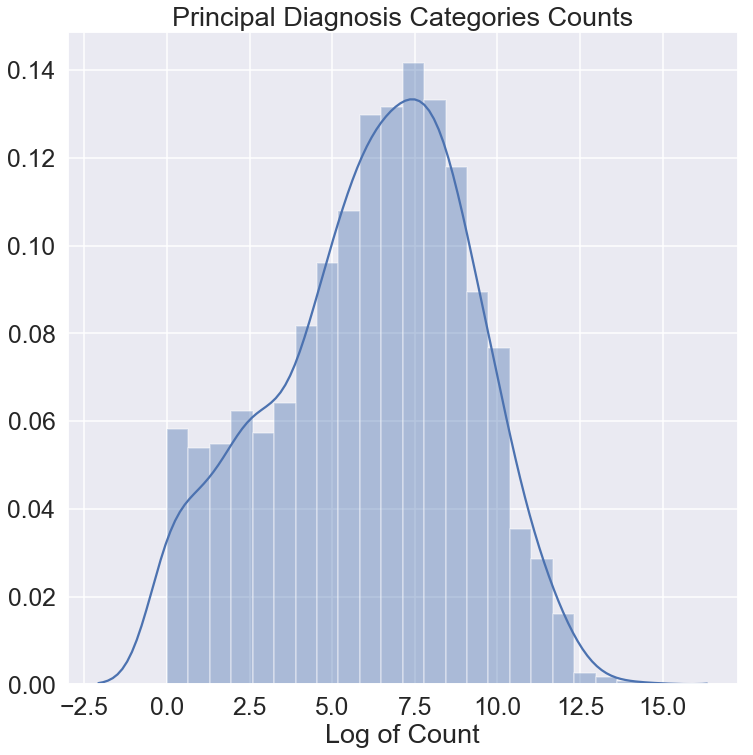

In [69]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(diag_cat_count['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts")

plt.xlabel('Log of Count')

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

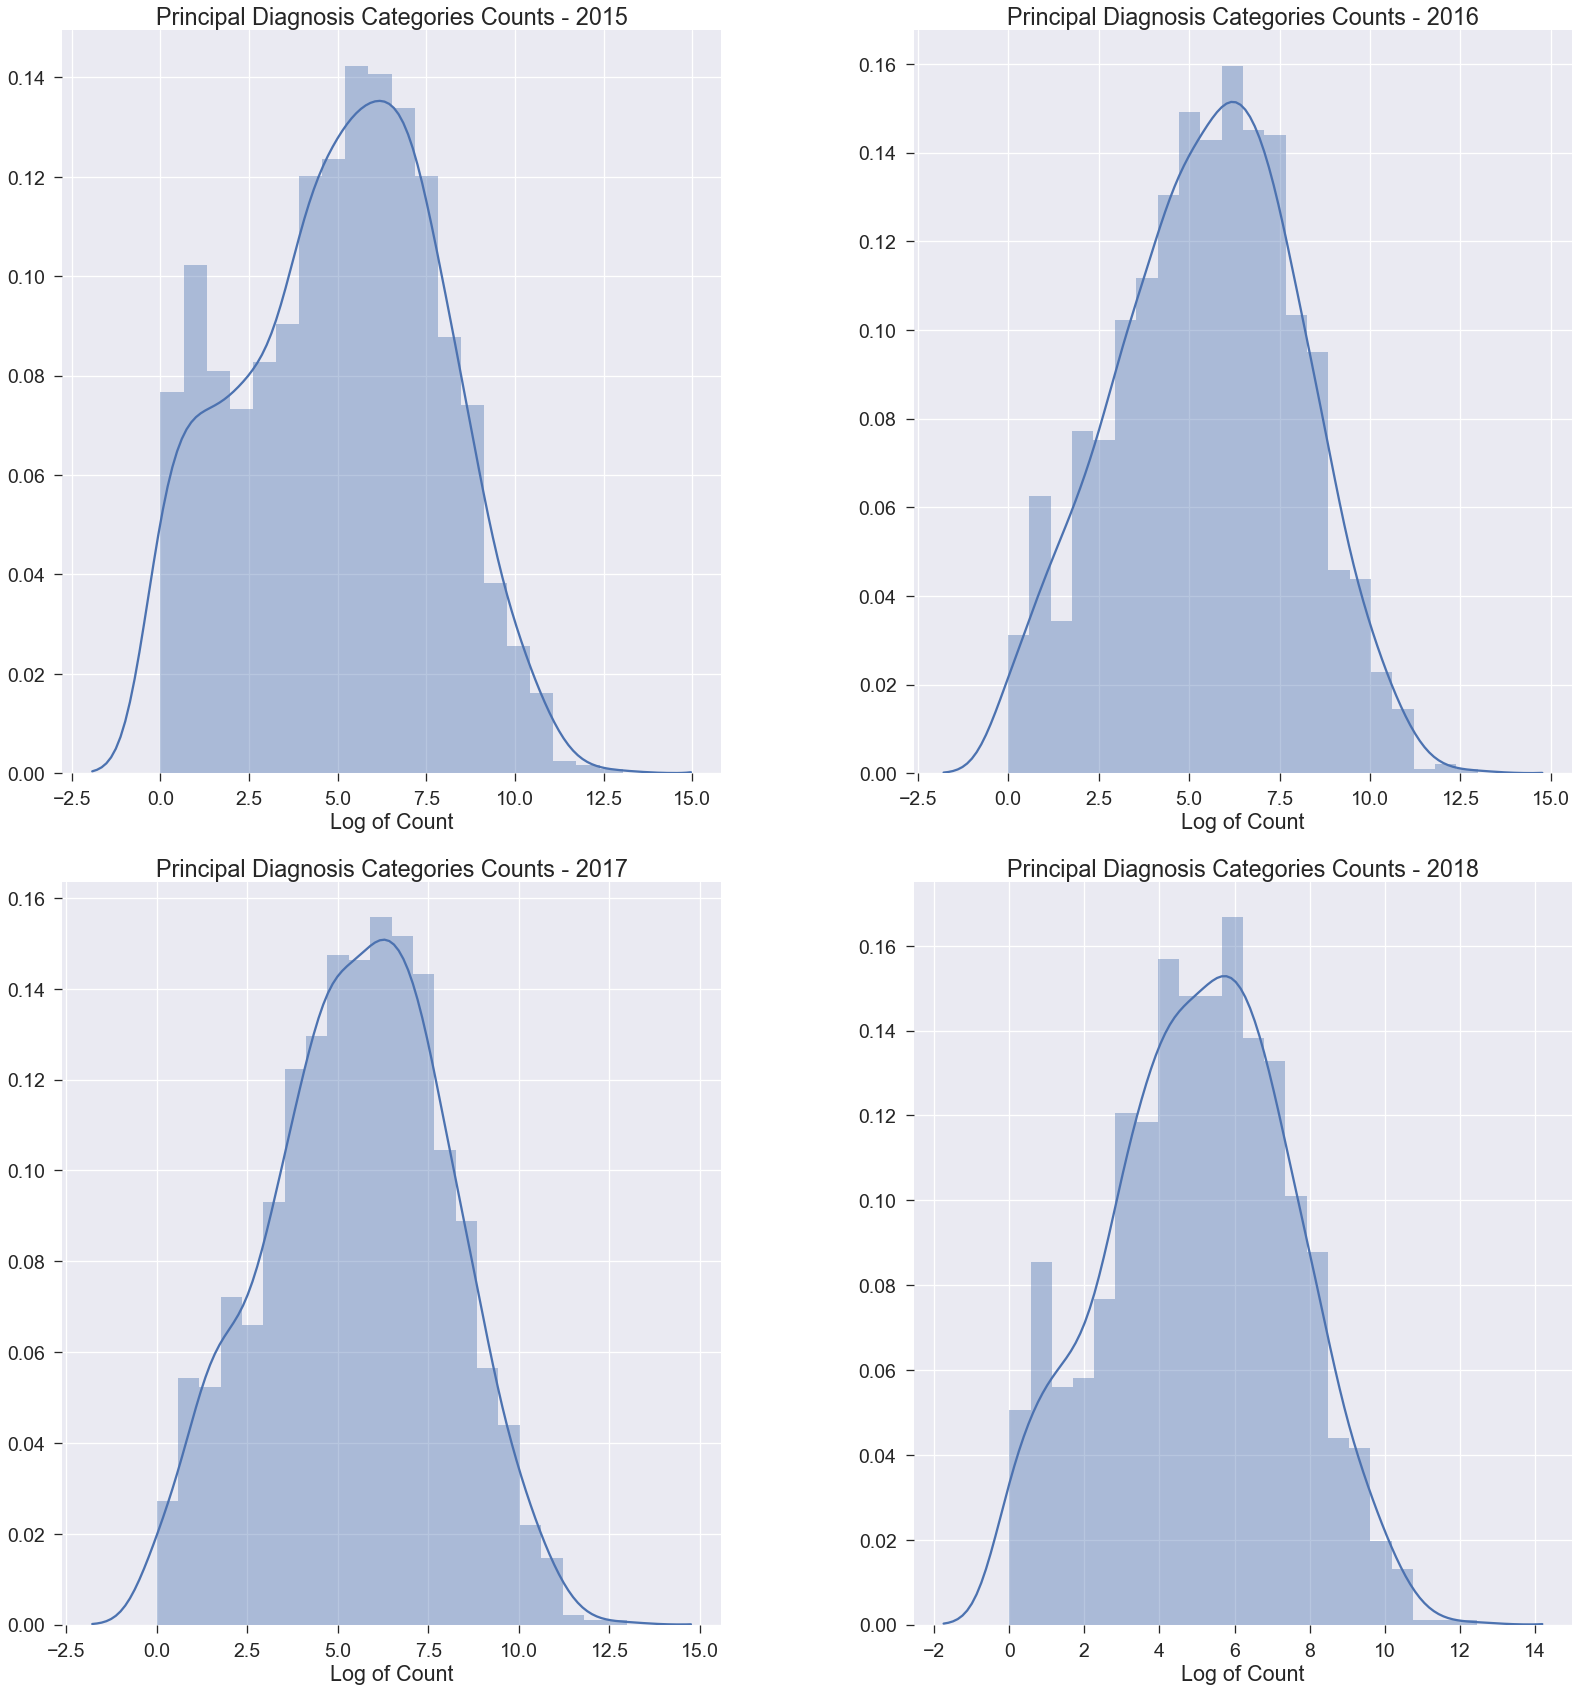

In [37]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(diag_cat_count_2015['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(diag_cat_count_2016['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(diag_cat_count_2017['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(diag_cat_count_2018['DES_CAT']))

plt.title("Principal Diagnosis Categories Counts - 2018")

plt.xlabel('Log of Count')

plt.tight_layout(rect=[2, 2, 4, 4])

** Normal Distribution Tests of the Diagnosis Categories Counts**

**D’Agostino and Pearson’s Normality Test**

*From the documentation: This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s, test that combines skew and kurtosis to produce an omnibus test of normality.*

**Anderson-Darling Normality Test:** This test has been shown to have more statistical power for testing normality.

*From the documentation: The Anderson-Darling tests the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

> H0: Distribution is normal.

> H1: Distribution is not normal.

> alpha = 0.05

In [71]:
# Normality Tests

norm_dist_tests(df = diag_cat_count, col_name = 'DES_CAT')

D’Agostino and Pearson’s:  NormaltestResult(statistic=4304.849687451071, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=488.0443277291902, critical_values=array([0.575, 0.655, 0.785, 0.916, 1.09 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=1829, minmax=(1, 1577070), mean=9084.106068890103, variance=2215999209.3880863, skewness=22.56990745283503, kurtosis=692.149205785309)


The normality and distribution tests suggest that the counts of the principal diagnosis categories variable are not normally distributed.

In [39]:
# ECDF

x, y = ecdf(diag_cat_count['DES_CAT'])

x_theor, y_theor = theor_ecdf(df = diag_cat_count, col_name = 'DES_CAT', seed = 42)

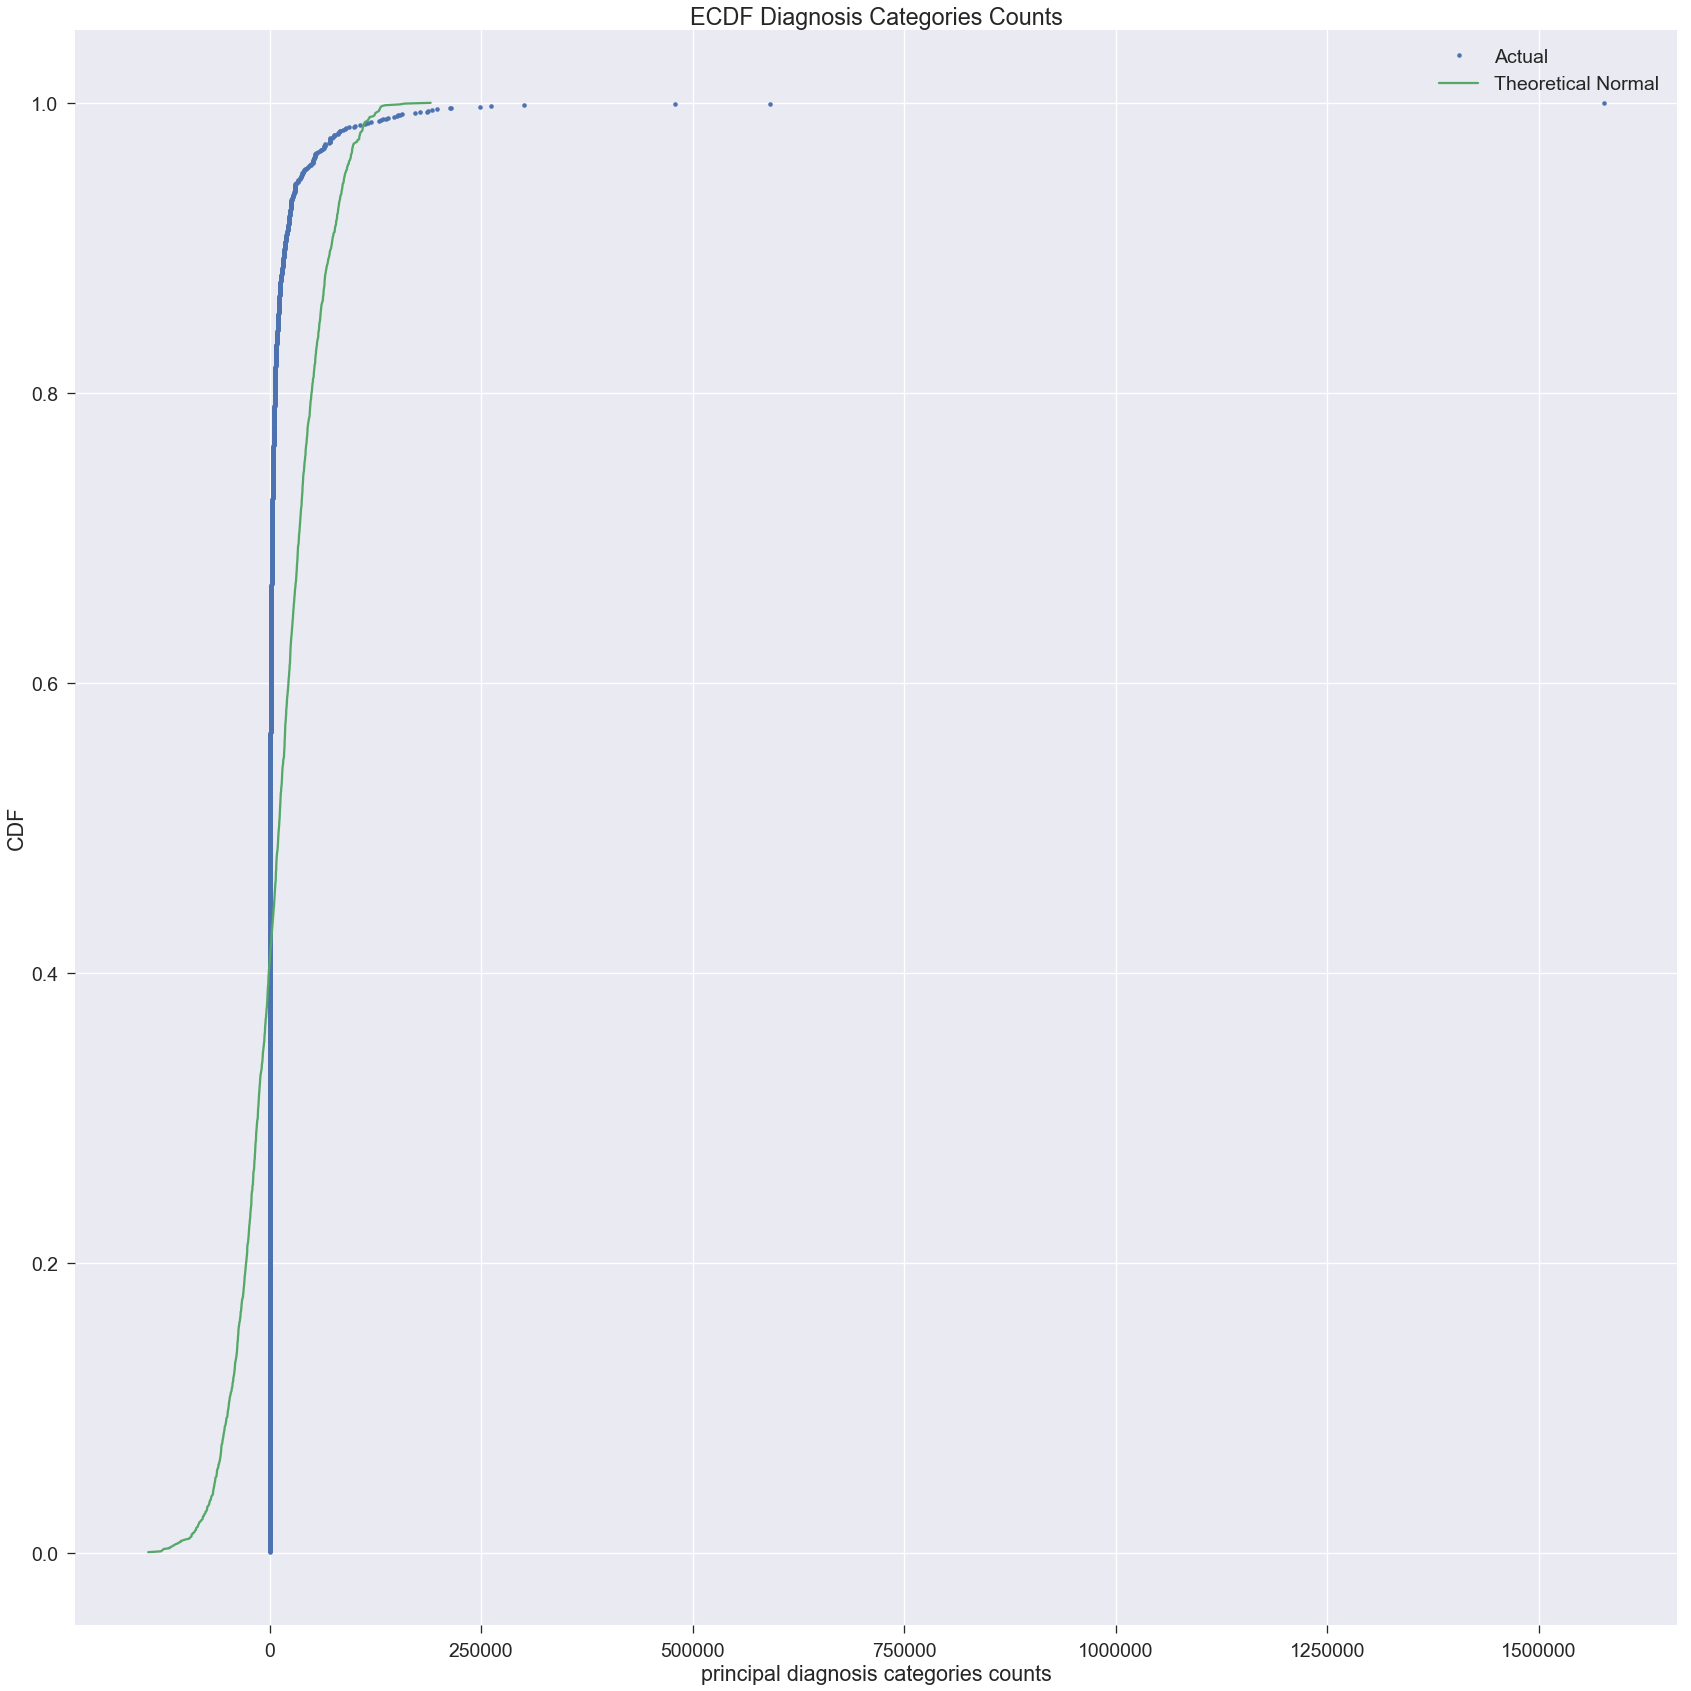

In [40]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Diagnosis Categories Counts")

plt.xlabel("principal diagnosis categories counts")

plt.ylabel('CDF')

plt.tight_layout(rect=[2, 2, 4, 4])

The distribution of principal diagnosis counts does not follow a theoretical normal distribution at all.

**Hypothesis Testing:** *Bootstrap Replicates*

> H0: Population mean is 9,084 diagnoses per category.

> Ha: Population mean is 9,084 diagnoses per category.

> alpha = 0.05

In [44]:
diag_cat_count_mean = np.mean(diag_cat_count['DES_CAT'])

diag_cat_count_mean

9084.106068890103

In [42]:
# Replicates

%time

n_tries = 10000

diag_cat_mean_replicates = bs_sample(diag_cat_count['DES_CAT'], np.mean, size = n_tries)

Wall time: 0 ns


C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


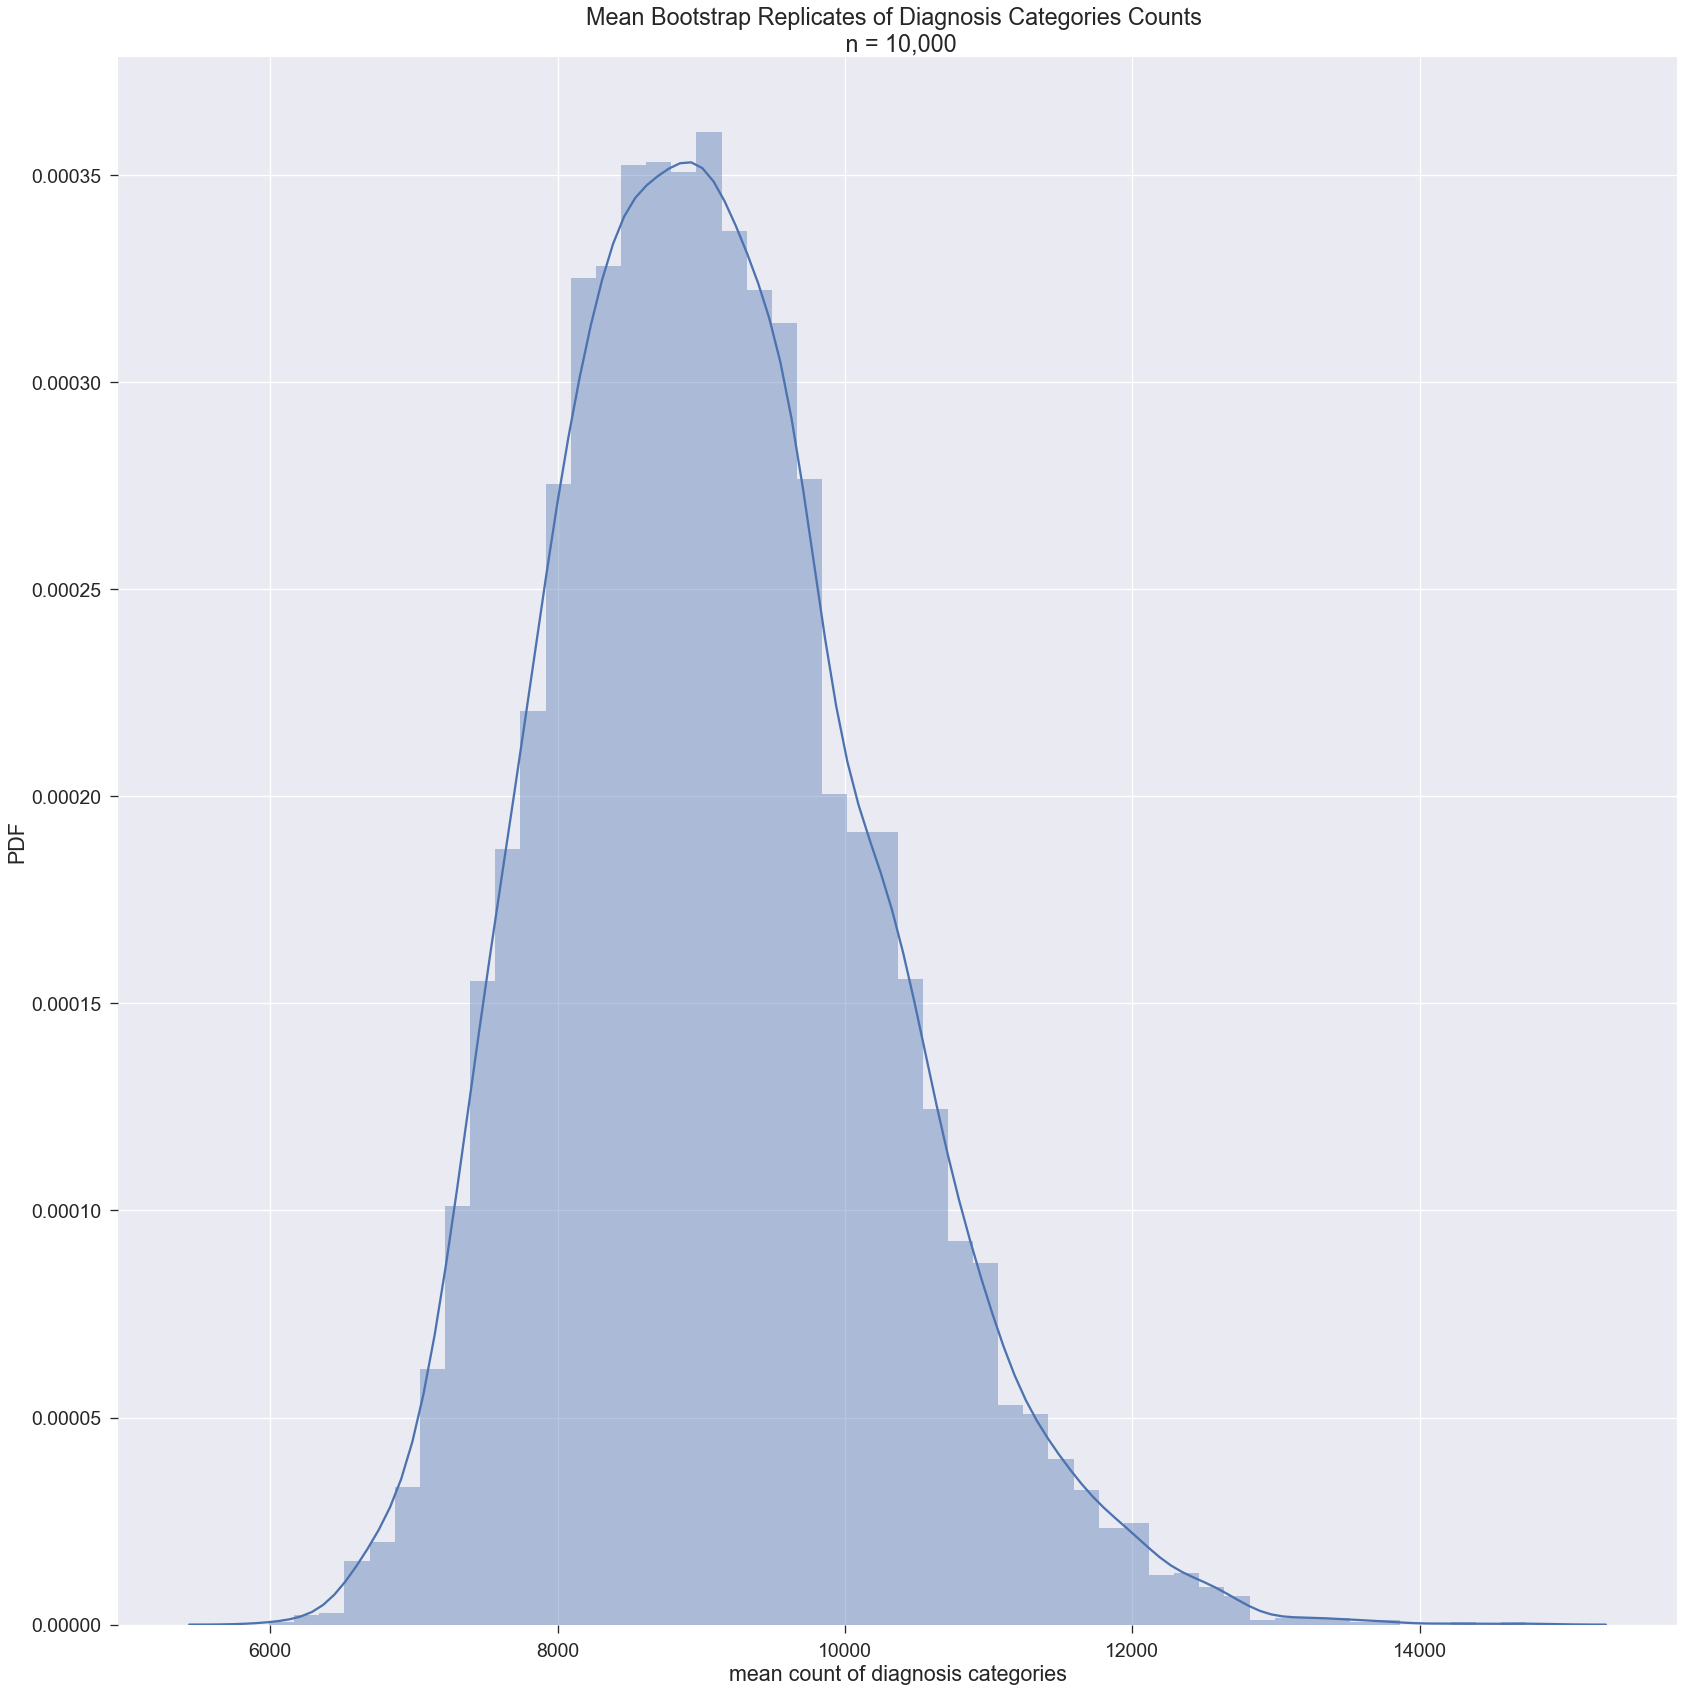

In [43]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(diag_cat_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean count of diagnosis categories')

plt.title("Mean Bootstrap Replicates of Diagnosis Categories Counts \n n = 10,000")

plt.tight_layout(rect=[2, 2, 4, 4])

* The bootstrap replicates are normally distributed. 
* The distribution contains the sample mean of 9,084.10

In [77]:
boot_conf_int(ci = [2.5,97.5], mean_rep = diag_cat_mean_replicates, 
              mean = diag_cat_count_mean)

Bootstrap Mean Replicates 95% CI:  [ 7232.28834062 11541.97352378]
P-value of patient age mean replicates:  0.5317


The bootstrap mean replicates shows a 95% confidence interval for diagnosis counts is between 7,232.28 and 11,541. This is a wide interval.This range contains the sample mean of 9,084. The p-value is 0.43 which is above the alpha level of 0.05, this means we cannot reject the hypothesis that the mean cases per category is 9,084.

**Hypothesis Testing:** *One Sample T-Test*

> H0: Population mean is 9,084 diagnoses per category.

> Ha: Population mean is 9,084 diagnoses per category.

> alpha = 0.05

In [78]:
# One-sided t-test

stats.ttest_1samp(diag_cat_count.DES_CAT, diag_cat_count_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

The p-value is above the alpha level of 0.05. This suggests that we cannot reject the null hypothesis that the population mean is 9,084 per category.

## Export Cleaned Diagnosis Data

The numerical categorical values are the ones that will be used in the model

In [79]:
diag_CID10.to_csv('AIH_sample_diag.csv', index = False, 
                  na_rep= 'NaN', encoding='utf-8', 
                  chunksize = 50000)